In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style = "whitegrid",font_scale = 1.5)
%matplotlib inline
plt.rcParams['figure.figsize']=[12,8]

In [2]:
#importing Dataset
sensor_df = pd.read_csv('sensor.csv')

In [3]:
## Basic Exploration
print("The dataset has " , sensor_df.shape[0],"rows and", sensor_df.shape[1], "columns")

The dataset has  220320 rows and 55 columns


In [4]:
#First and last 5 rows
sensor_df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [5]:
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

**DATA CLEANING**

In [6]:
#no values for sensor 15 and unnamed column is unnecessary
sensor_df.drop(['sensor_15','Unnamed: 0'],inplace = True,axis=1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [7]:
#check percentage of missing values for each column
(sensor_df.isnull().sum().sort_values(ascending=False)/len(sensor_df))*100

sensor_50         34.956881
sensor_51          6.982117
sensor_00          4.633261
sensor_07          2.474129
sensor_08          2.317992
sensor_06          2.177741
sensor_09          2.085603
sensor_01          0.167484
sensor_30          0.118464
sensor_29          0.032680
sensor_32          0.030864
sensor_17          0.020879
sensor_18          0.020879
sensor_22          0.018609
sensor_25          0.016340
sensor_16          0.014070
sensor_49          0.012255
sensor_48          0.012255
sensor_47          0.012255
sensor_46          0.012255
sensor_45          0.012255
sensor_44          0.012255
sensor_43          0.012255
sensor_42          0.012255
sensor_41          0.012255
sensor_40          0.012255
sensor_39          0.012255
sensor_38          0.012255
sensor_14          0.009532
sensor_26          0.009078
sensor_03          0.008624
sensor_10          0.008624
sensor_13          0.008624
sensor_12          0.008624
sensor_11          0.008624
sensor_05          0

In [8]:
#too many missing values in sensor 50 , so dropping that
sensor_df.drop('sensor_50',inplace = True,axis=1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [9]:
# convert time to index
sensor_df['index'] = pd.to_datetime(sensor_df['timestamp'])
sensor_df.index = sensor_df['index']

In [10]:
#Drop index and timestamp columns
sensor_df.drop(['index','timestamp'],inplace = True,axis=1)
sensor_df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


**Dealing with missing values**

In [11]:
#imputing missing values with mean
sensor_df.fillna(sensor_df.mean(),inplace= True)
sensor_df.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


**EDA**

In [14]:
NORMAL_counts = sensor_df[sensor_df['machine_status']=='NORMAL']['machine_status'].count()
RECOVERING_counts = sensor_df[sensor_df['machine_status']=='RECOVERING']['machine_status'].count()
BROKEN_counts = sensor_df[sensor_df['machine_status']=='BROKEN']['machine_status'].count()

NORMAL_counts, RECOVERING_counts, BROKEN_counts

(205836, 14477, 7)

In [12]:
sensor_df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

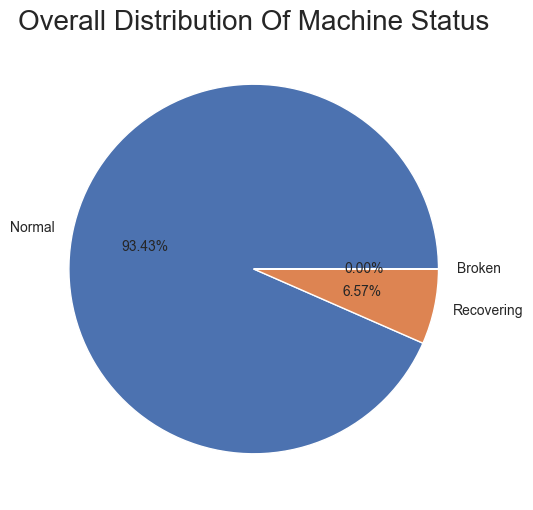

In [17]:
plt.figure(figsize=(10, 6))

#machine status -  pie chart
stroke_values = [NORMAL_counts,RECOVERING_counts,BROKEN_counts]
stroke_labels = ["Normal","Recovering","Broken"]

plt.pie(stroke_values,labels=stroke_labels, autopct='%2.2f%%',textprops={'fontsize': 10})

plt.title('Overall Distribution Of Machine Status', fontsize=20)

plt.show()

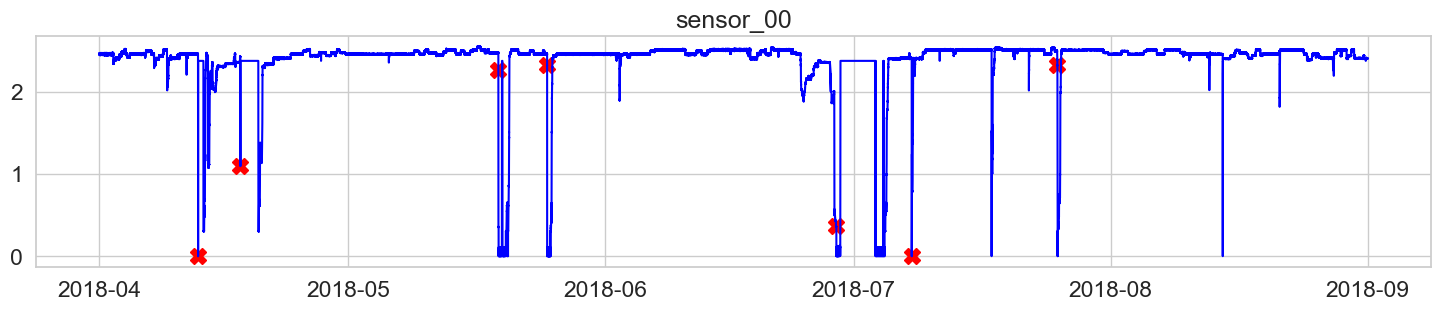

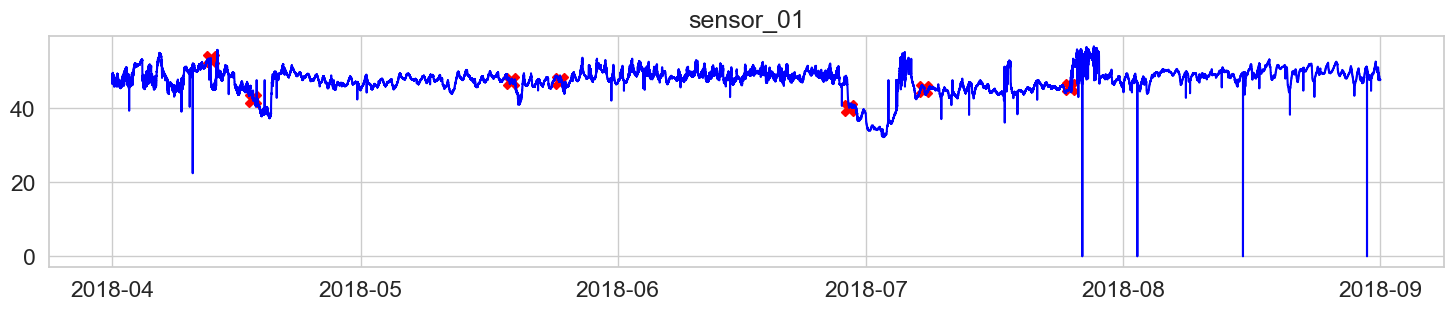

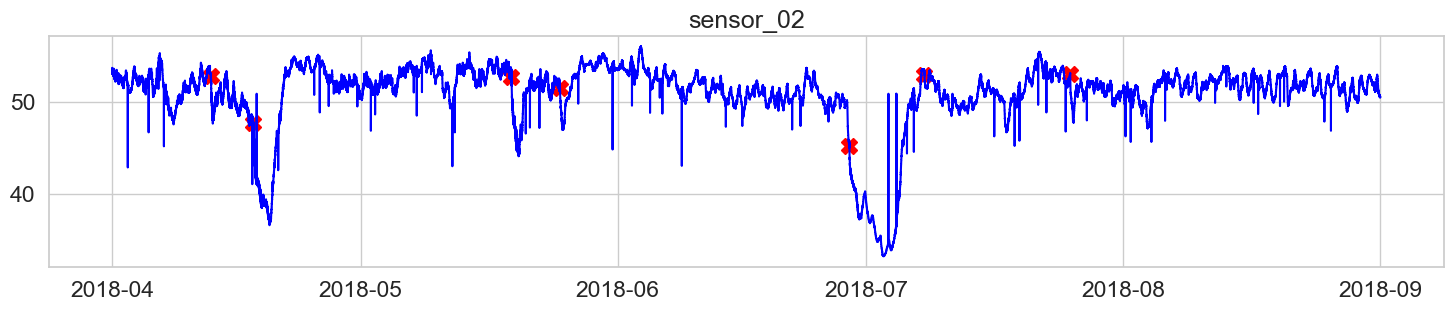

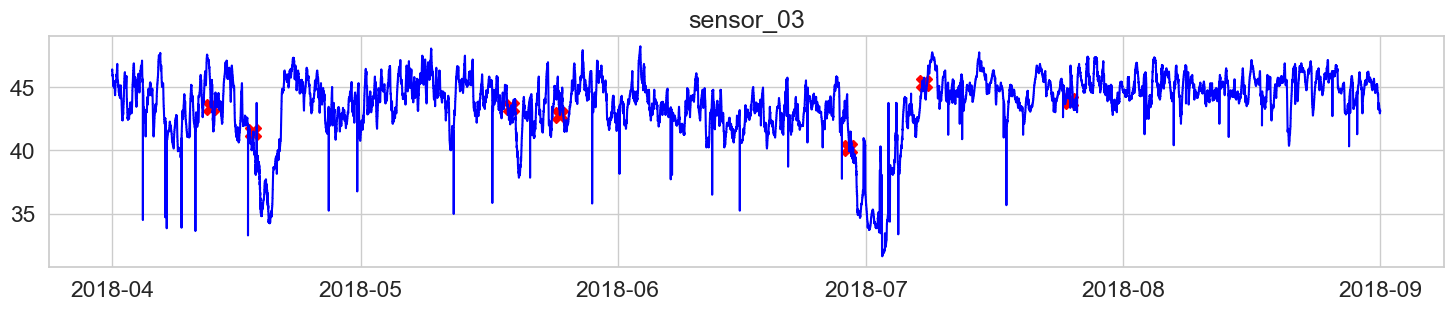

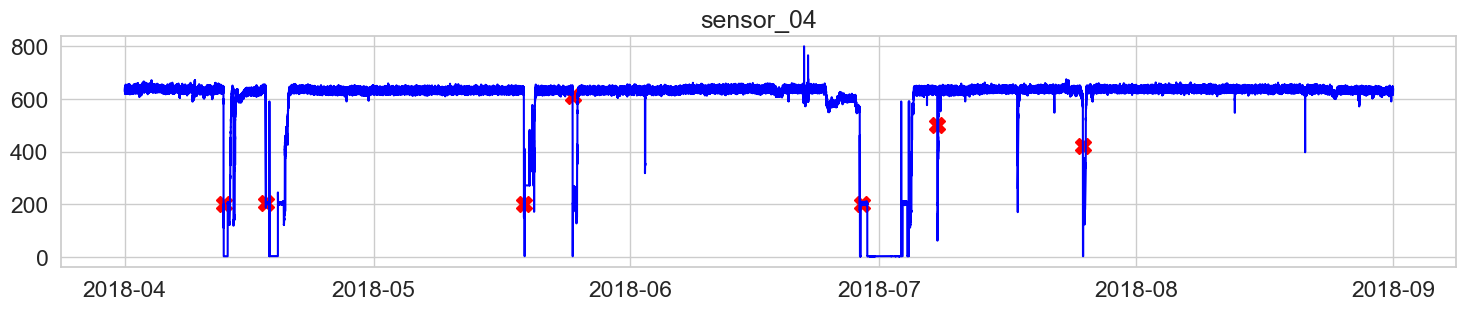

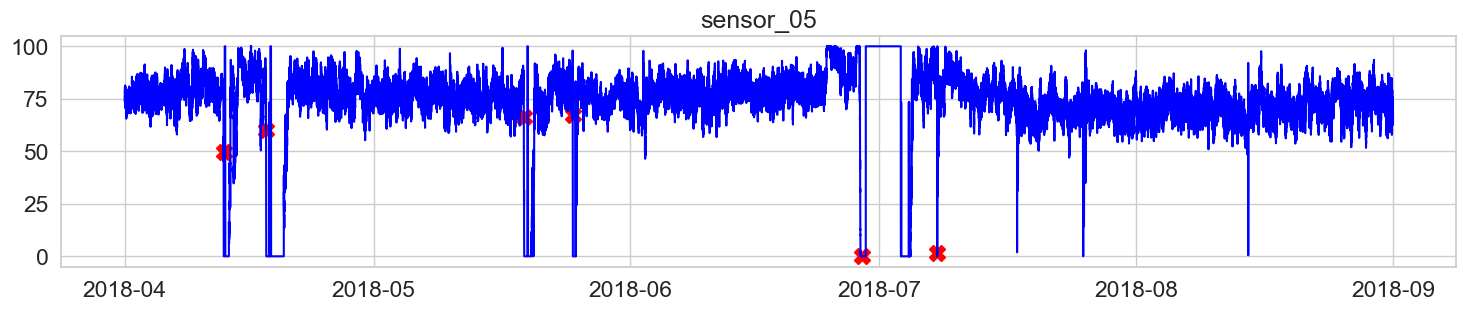

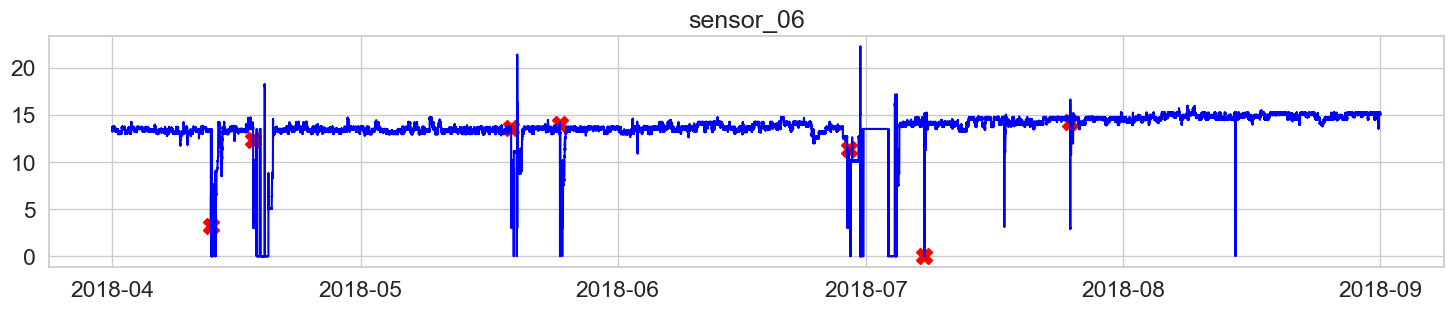

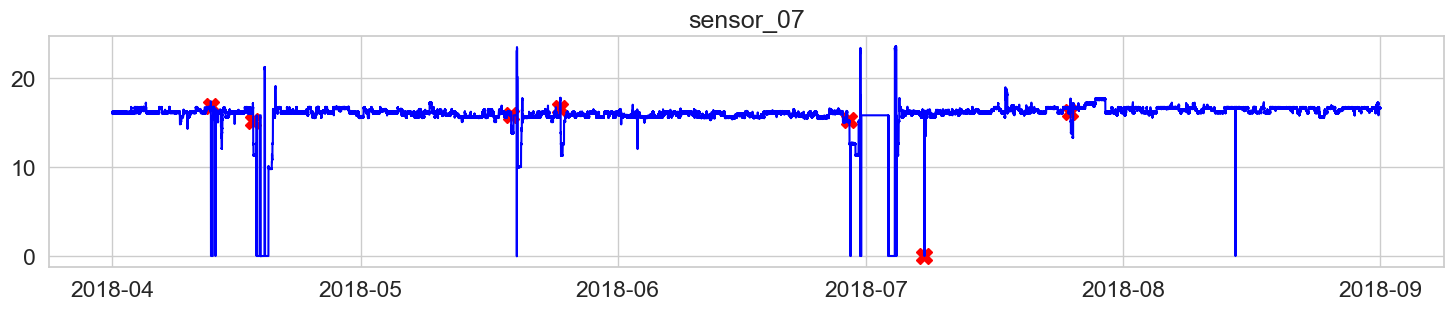

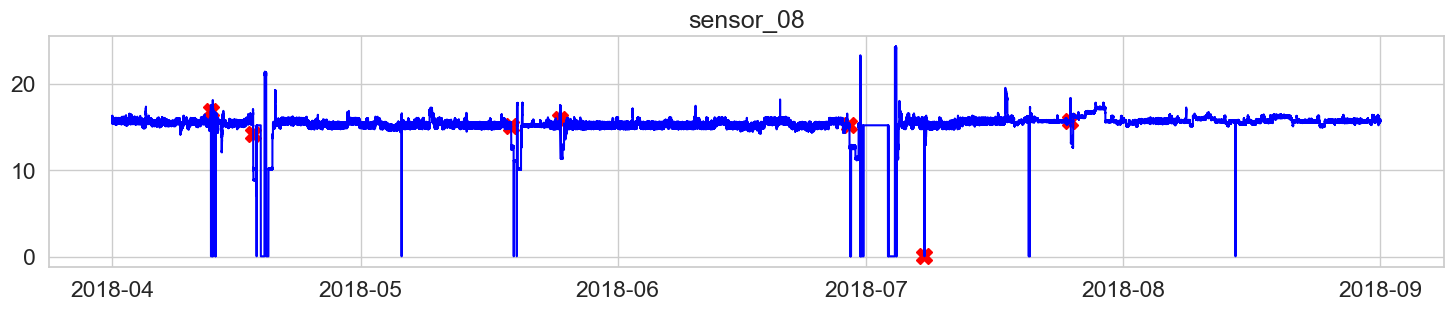

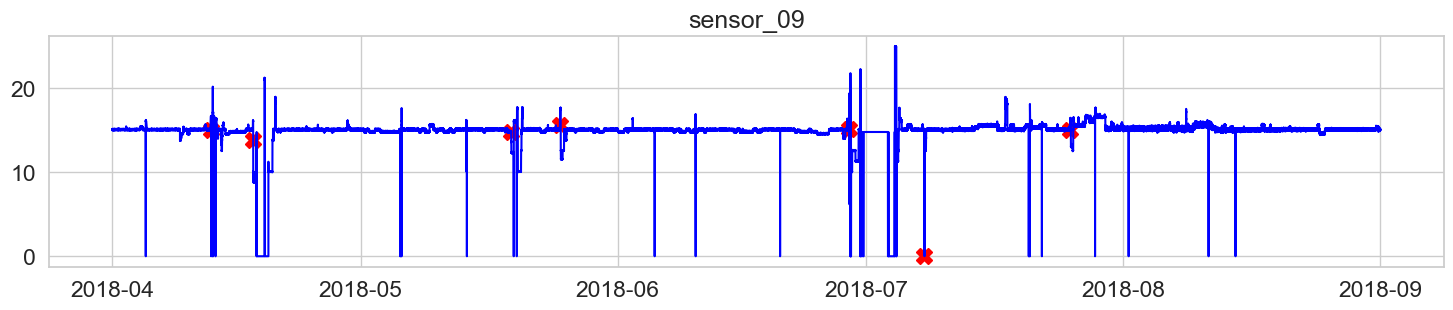

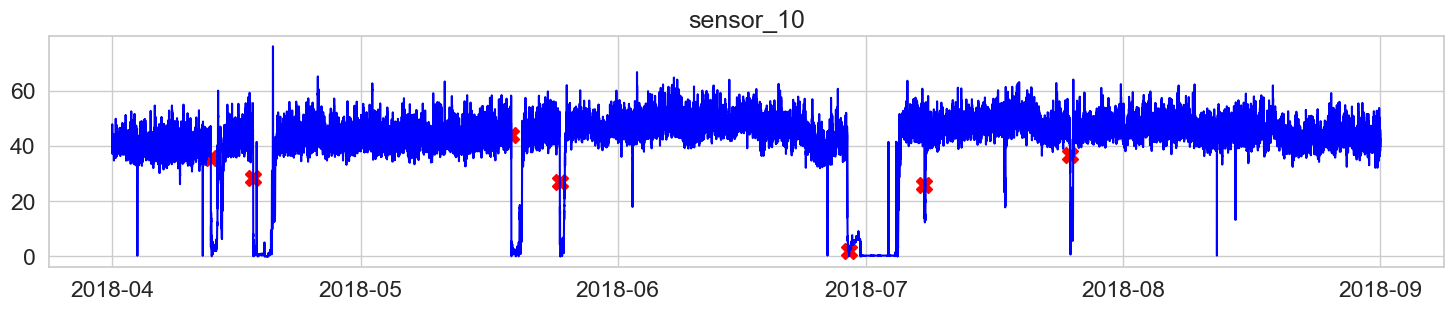

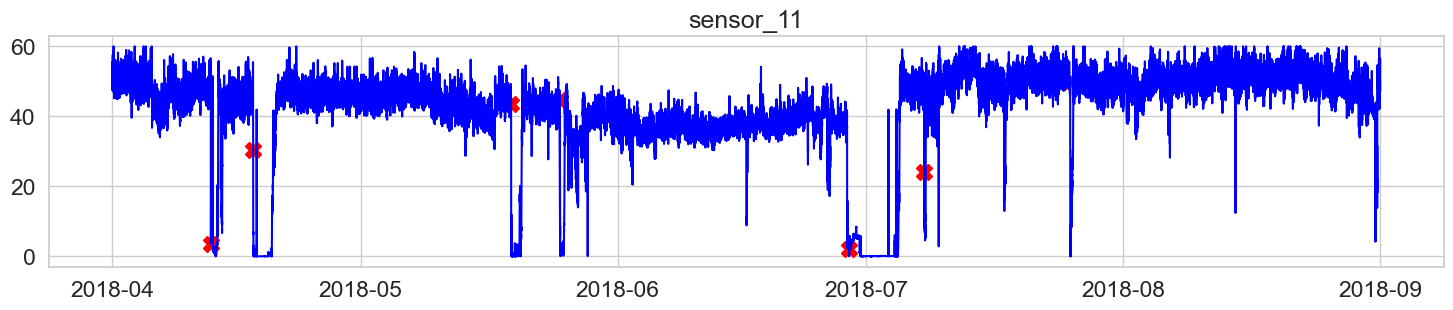

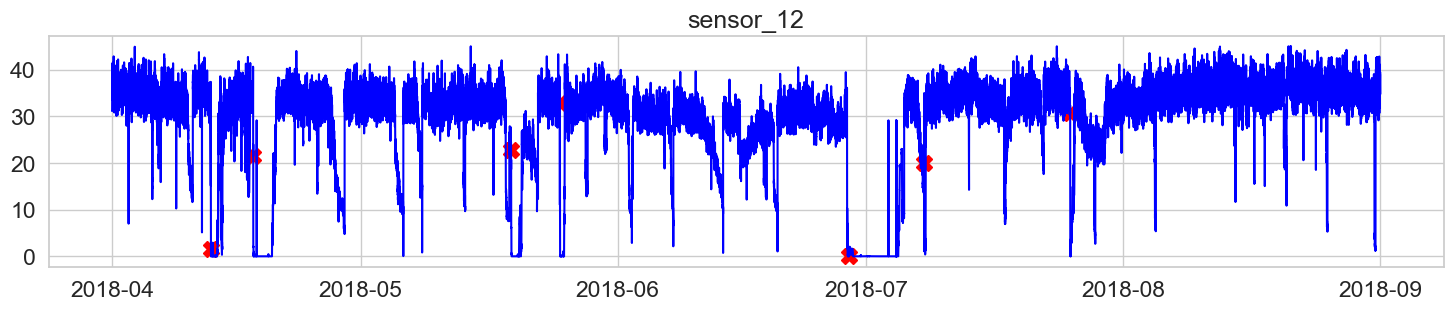

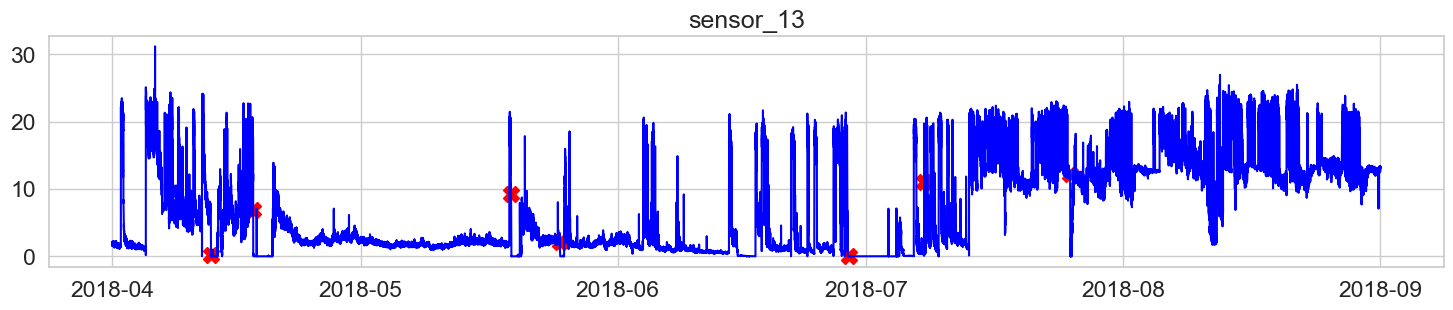

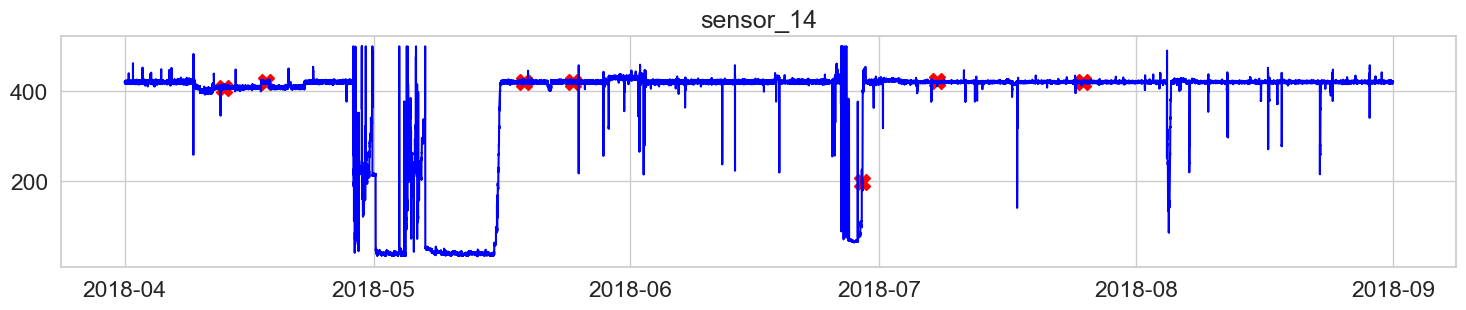

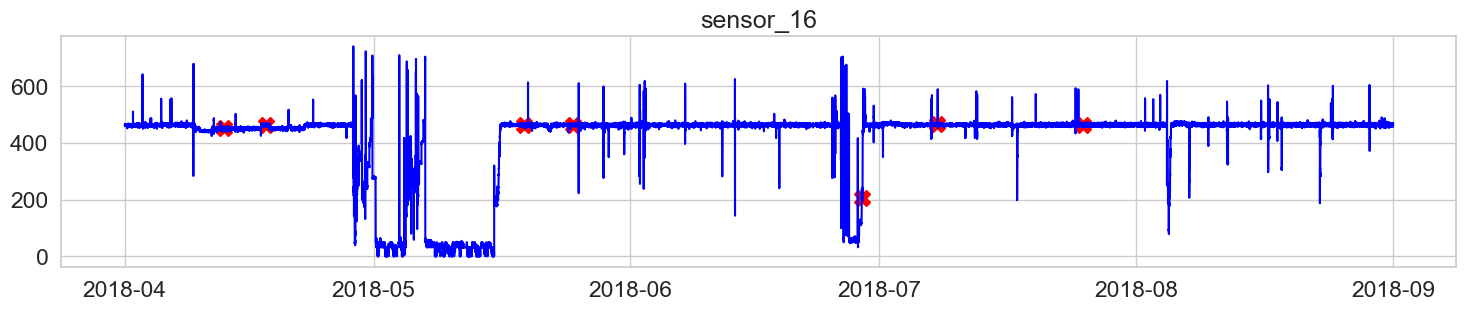

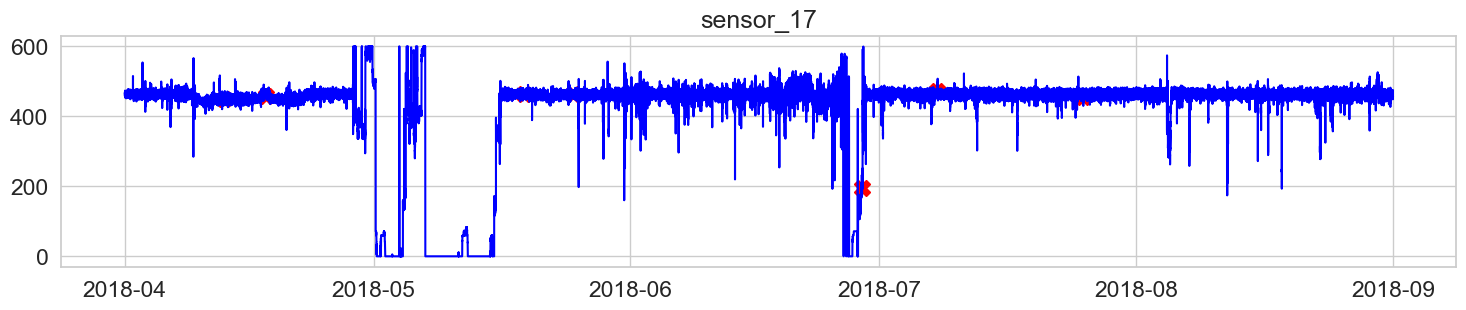

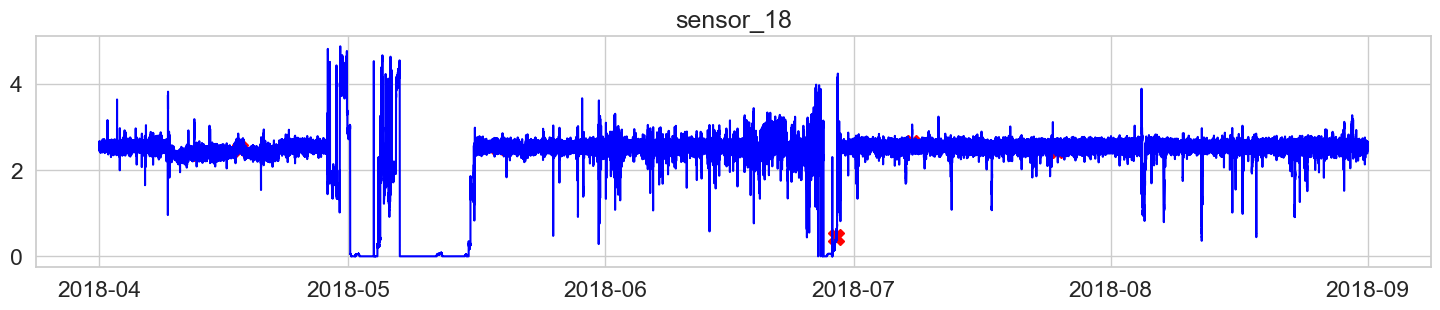

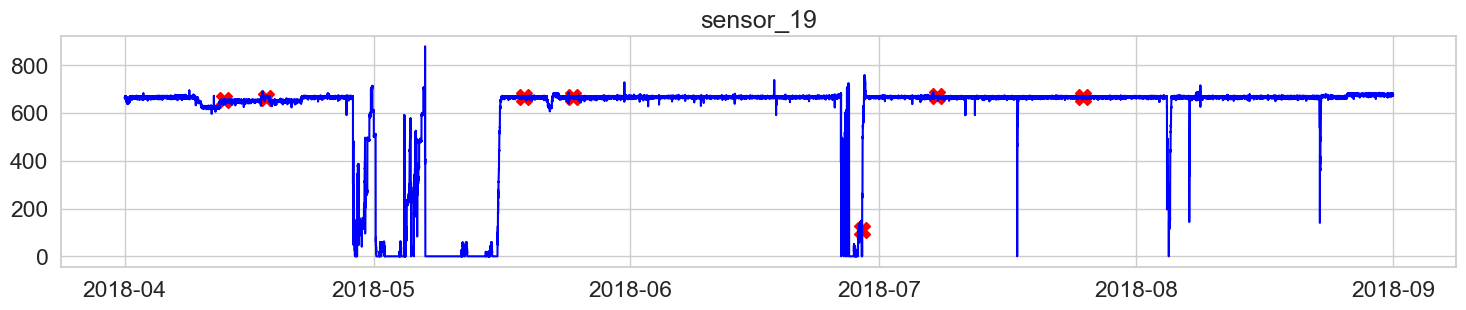

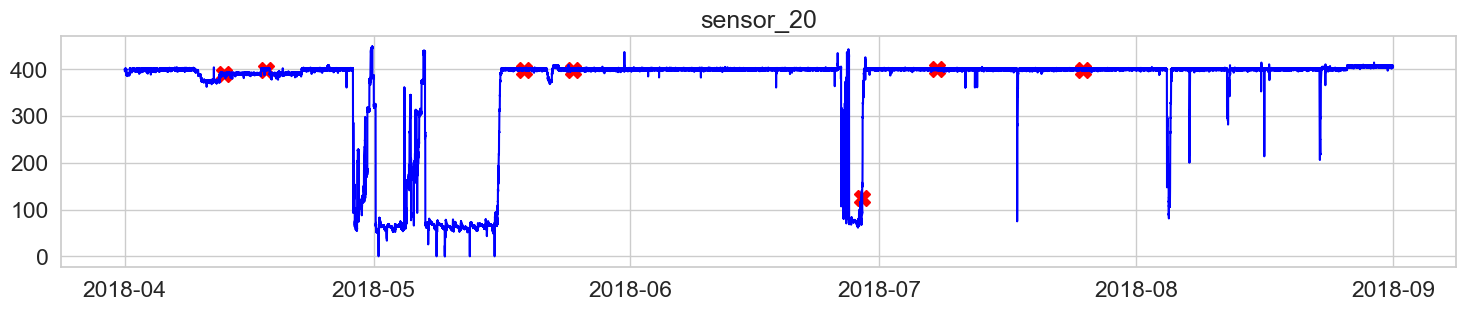

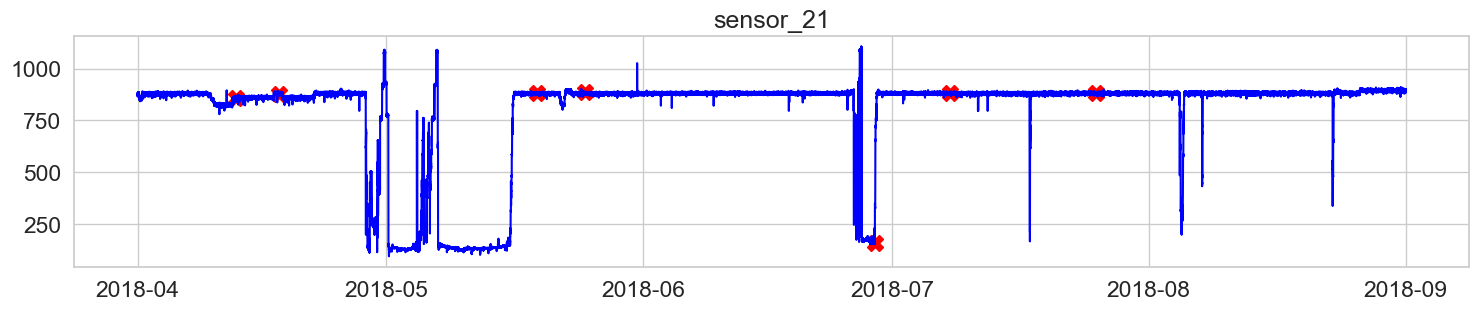

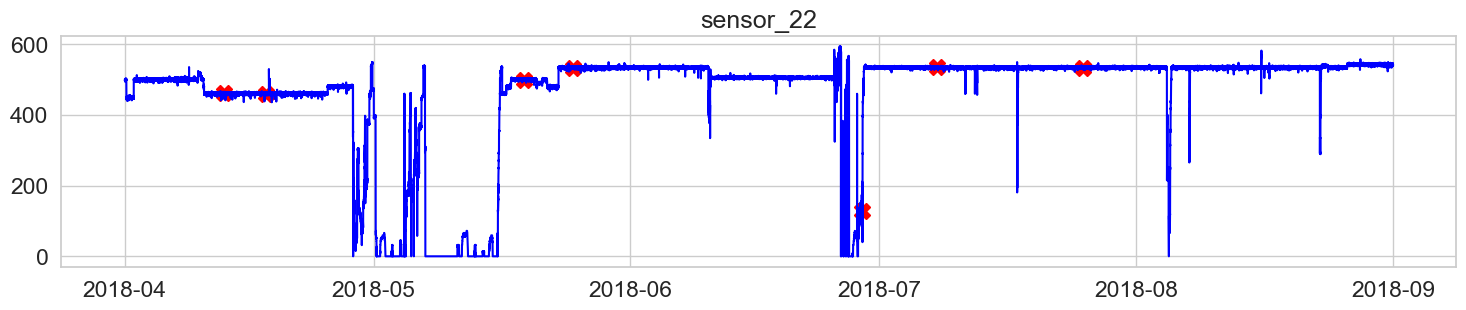

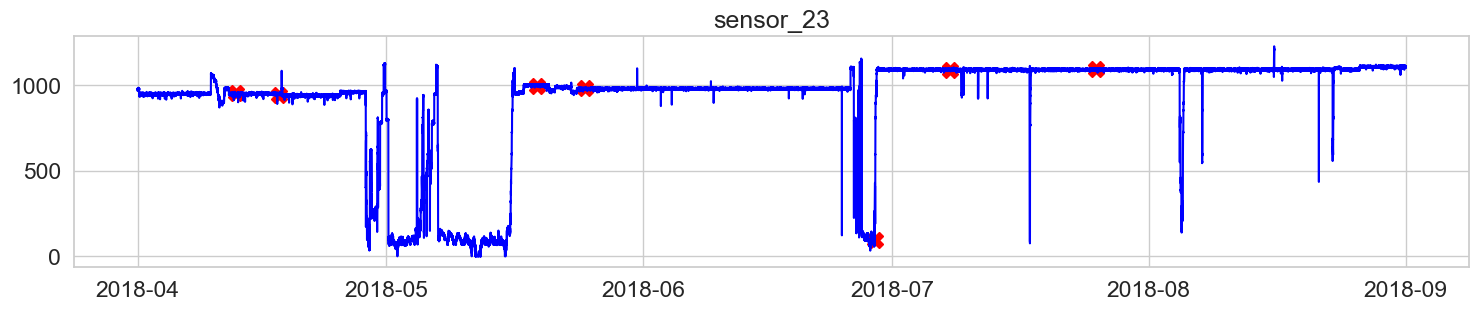

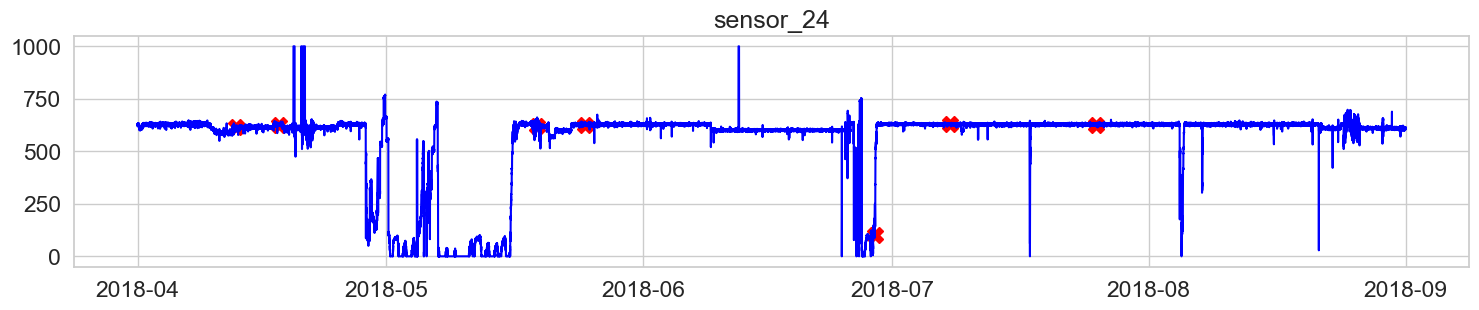

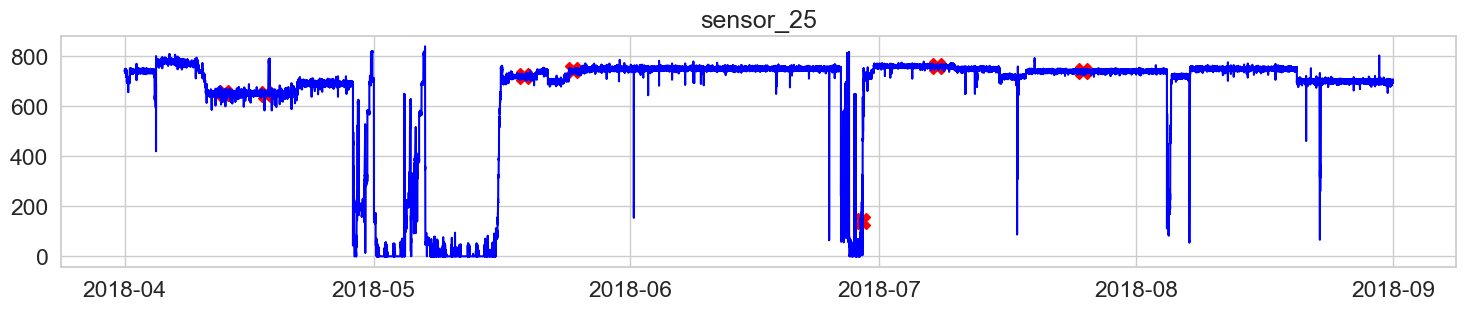

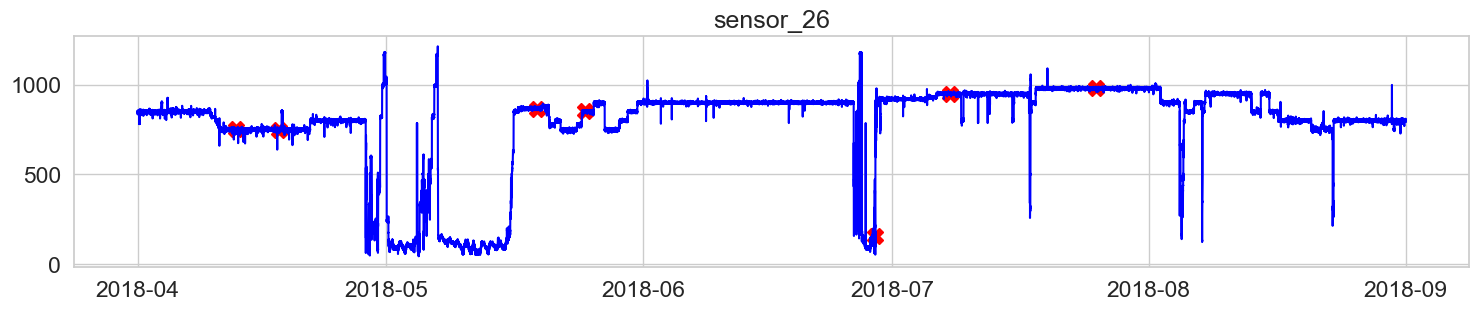

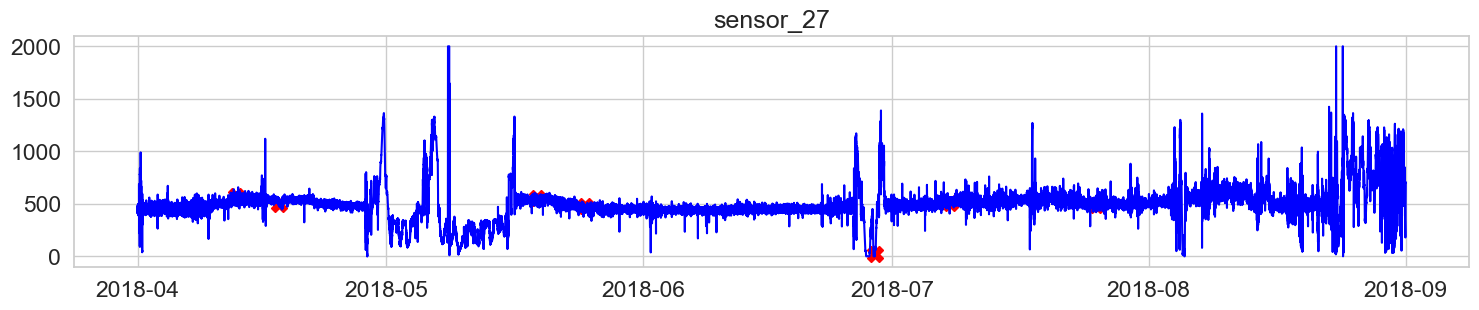

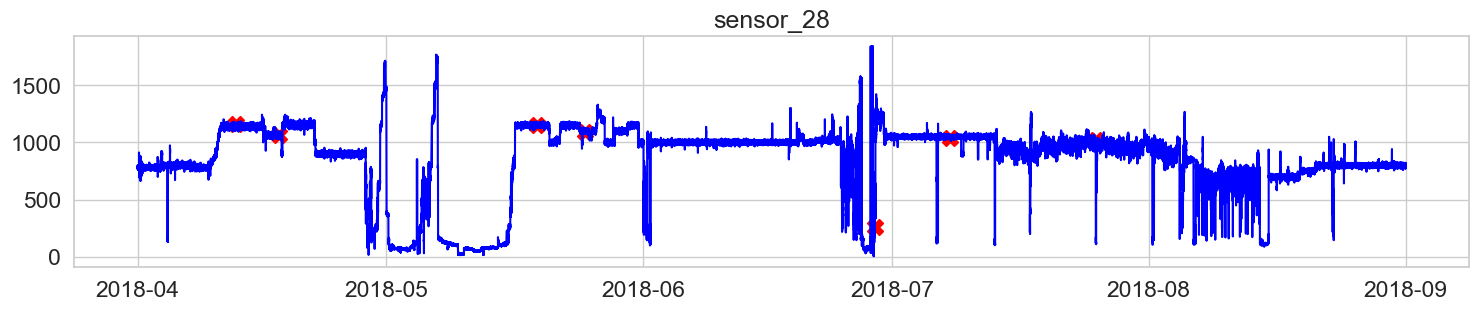

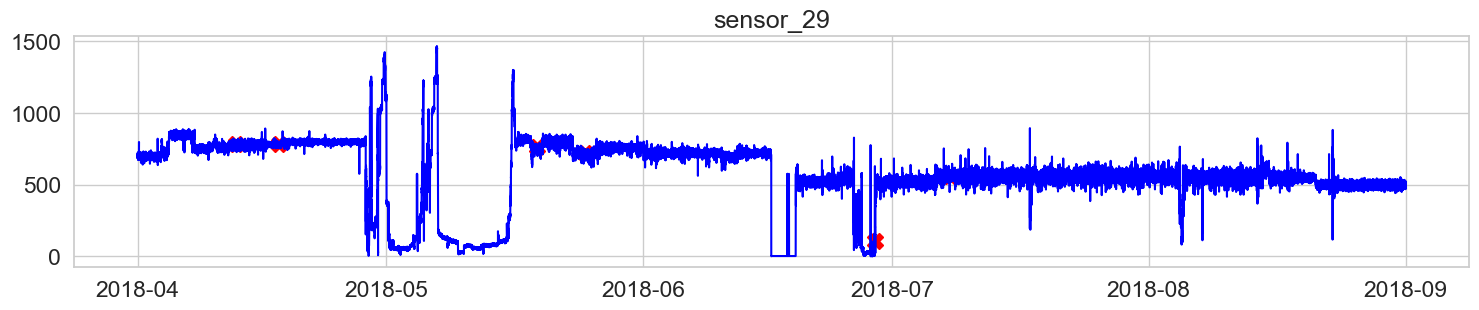

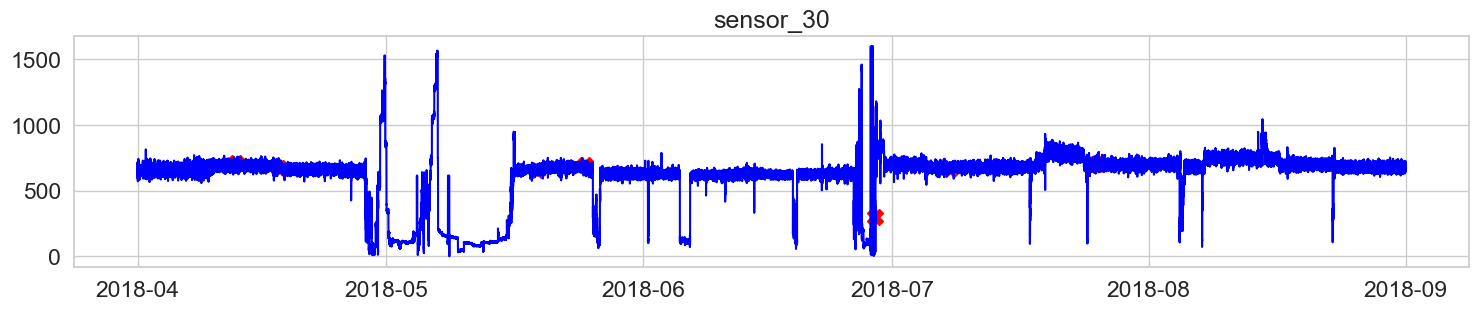

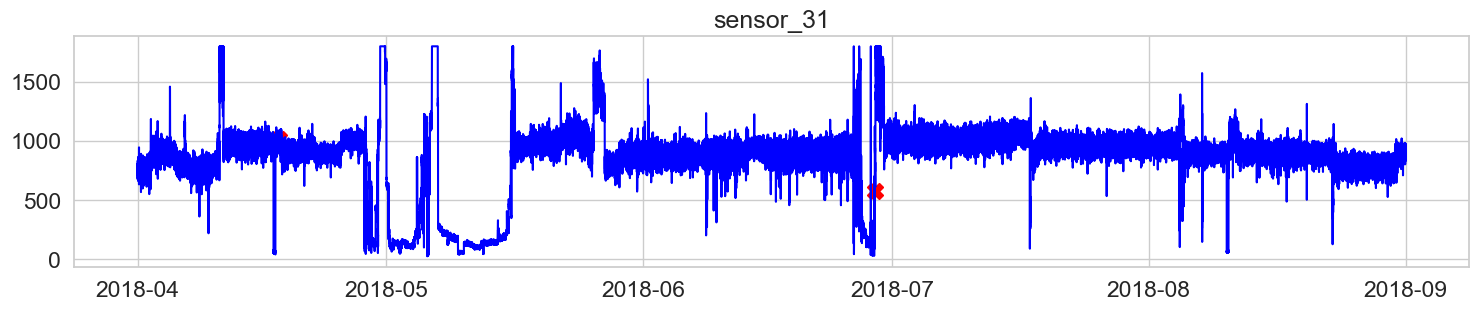

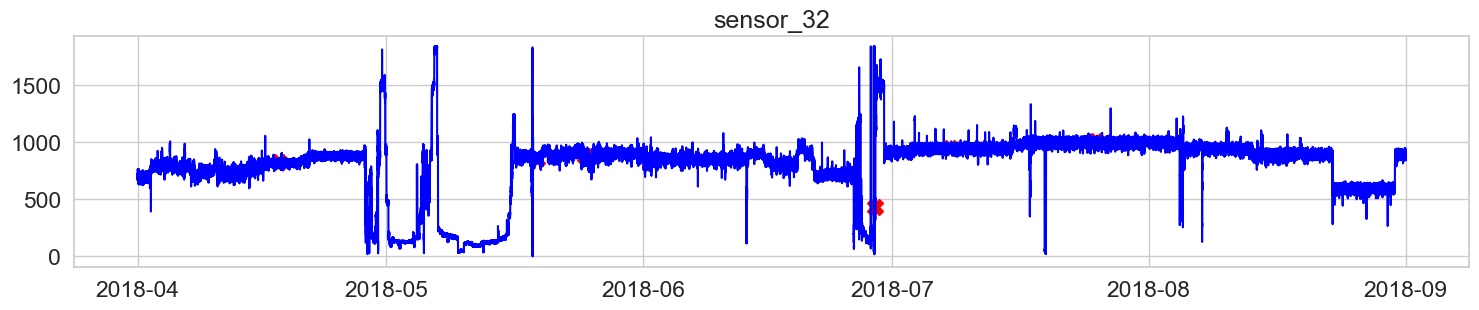

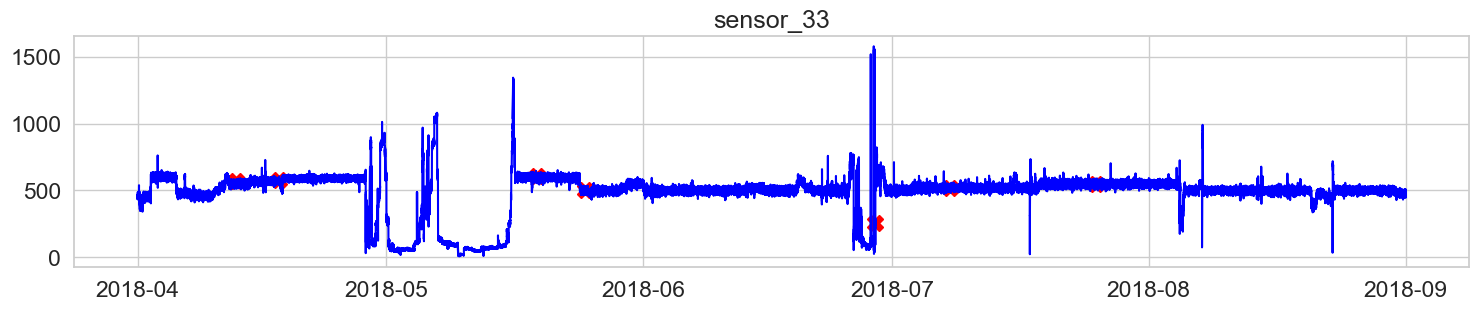

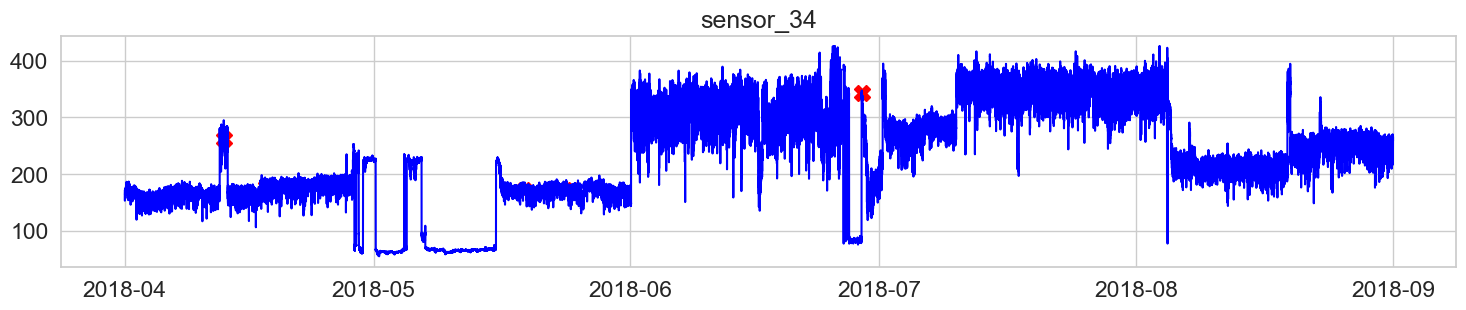

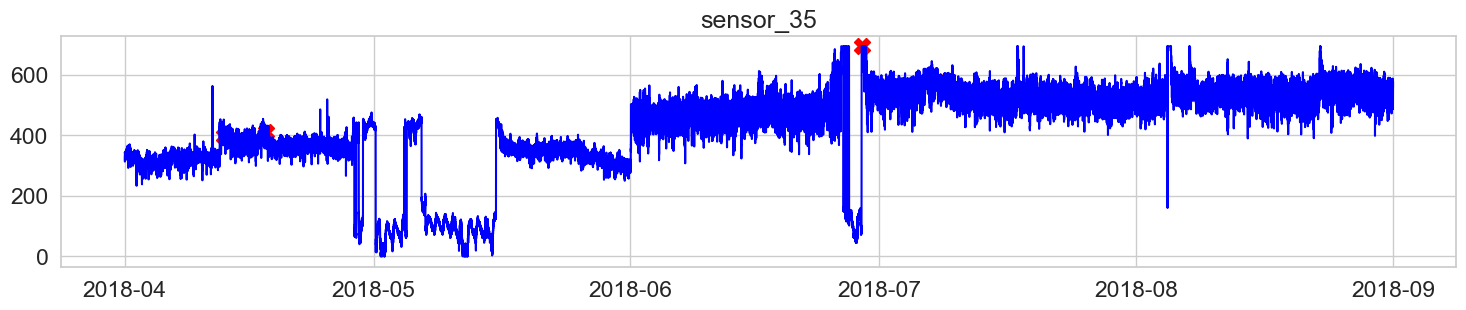

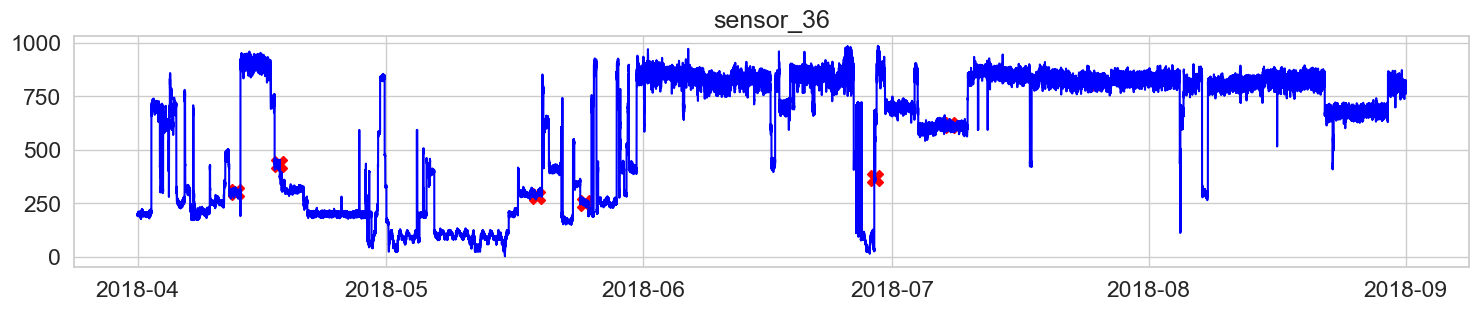

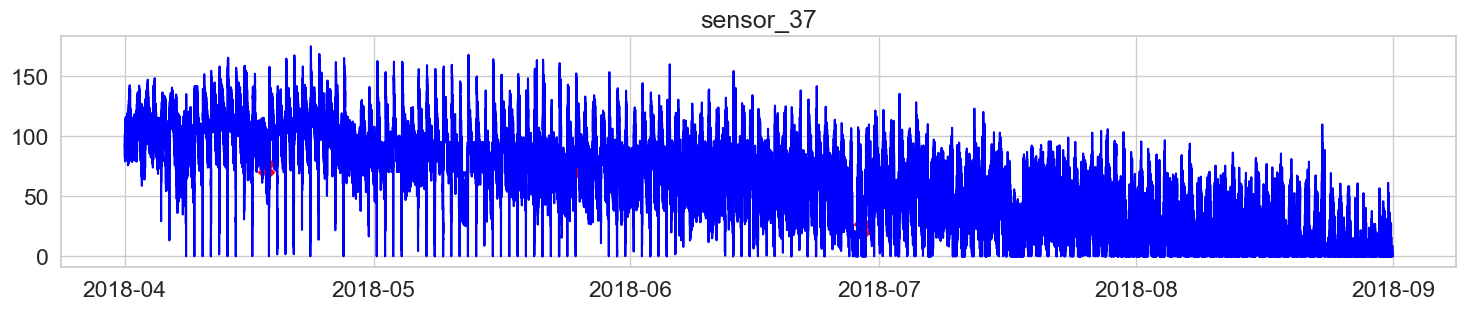

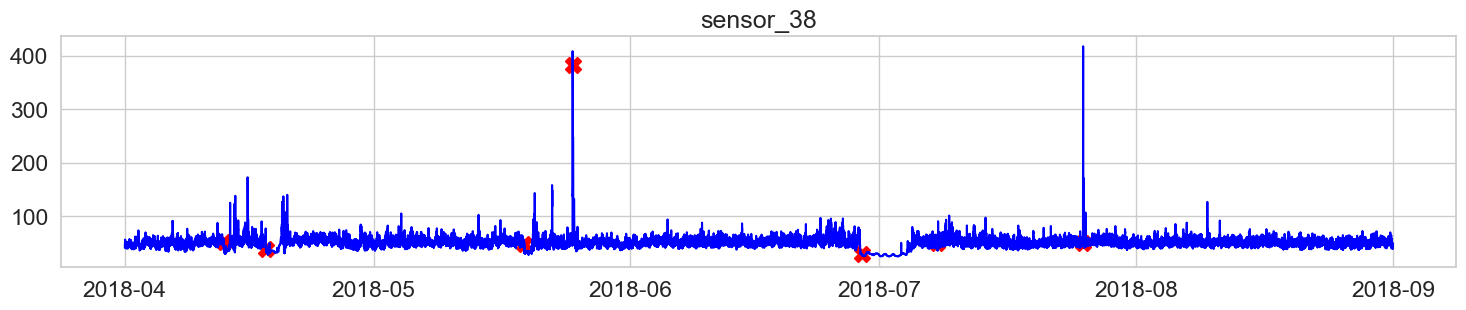

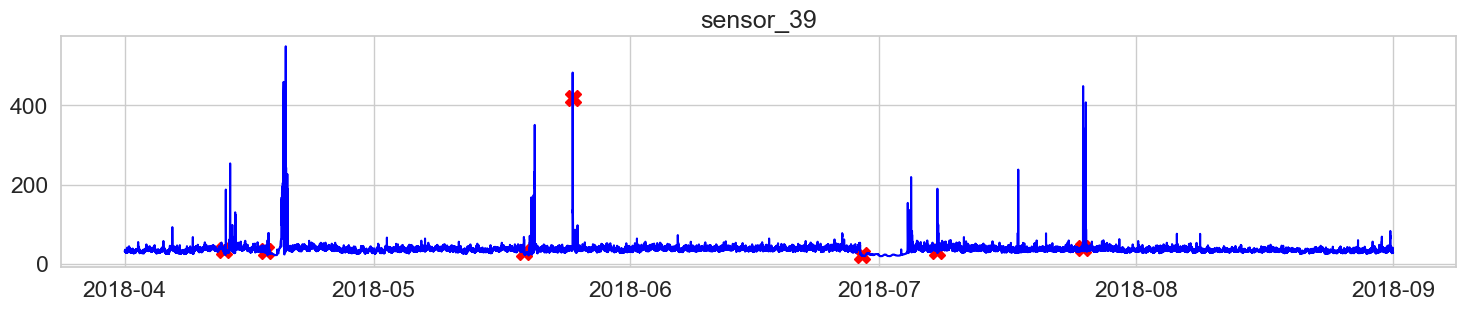

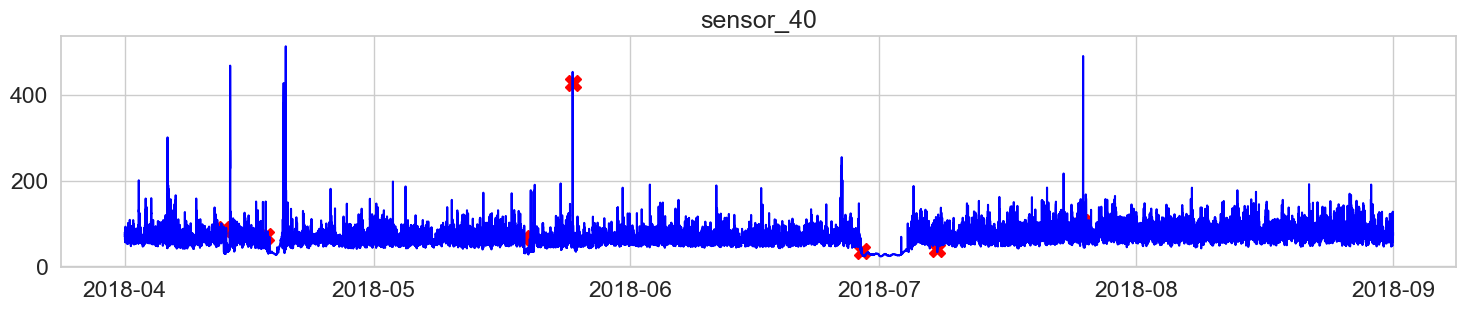

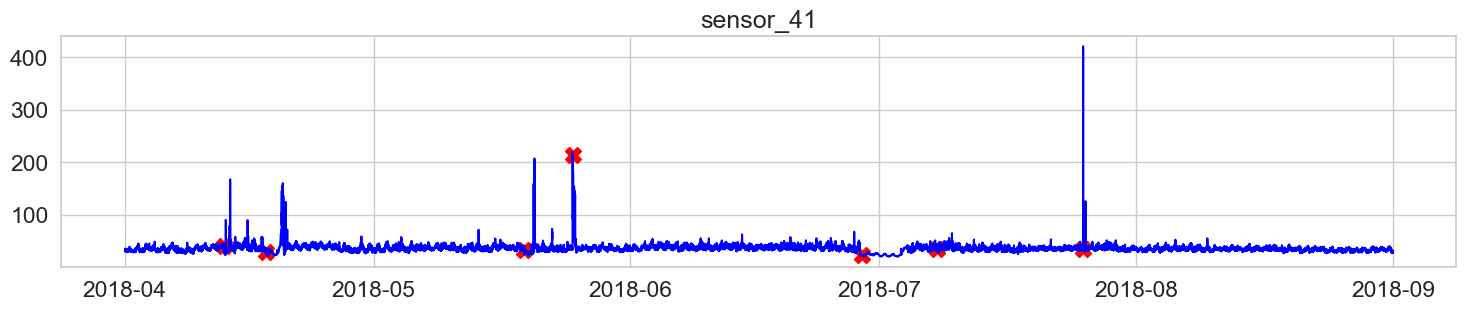

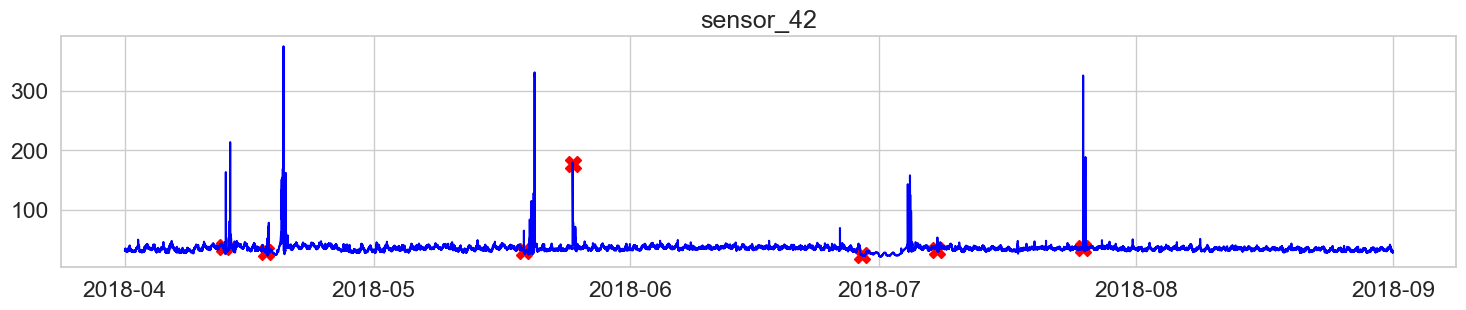

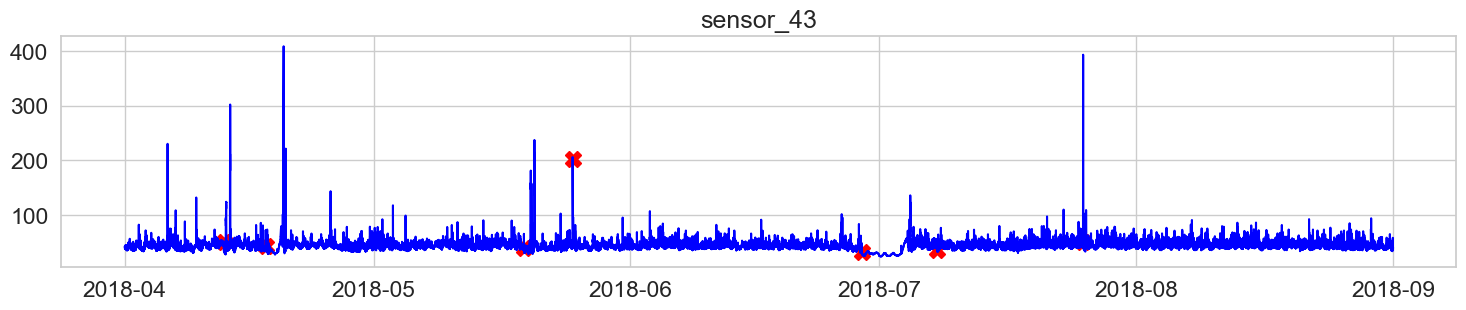

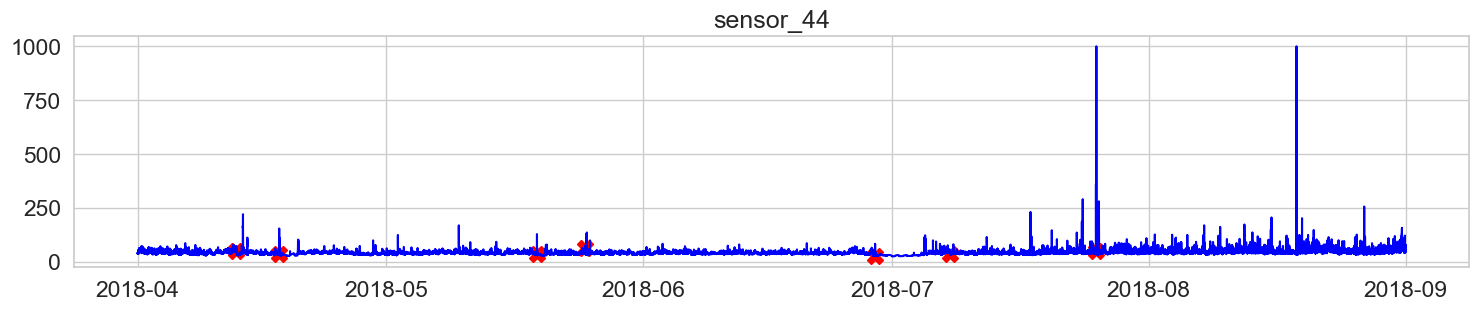

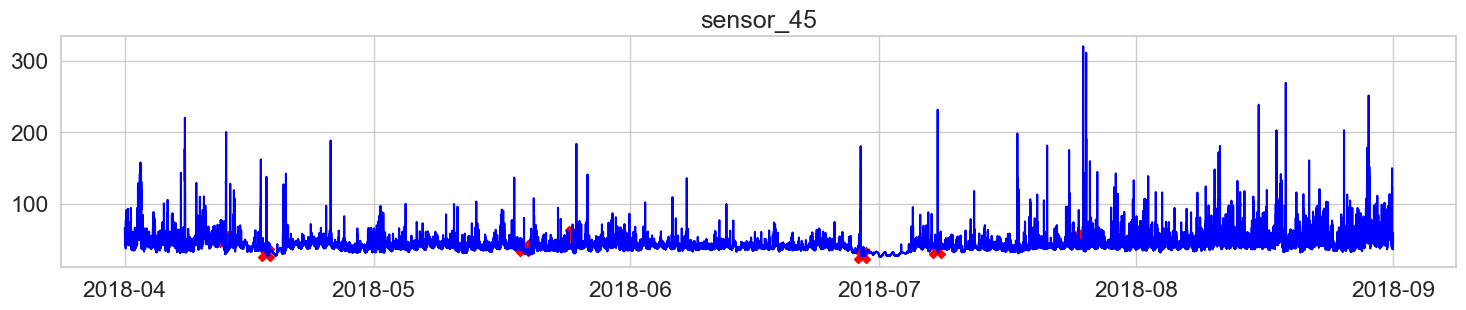

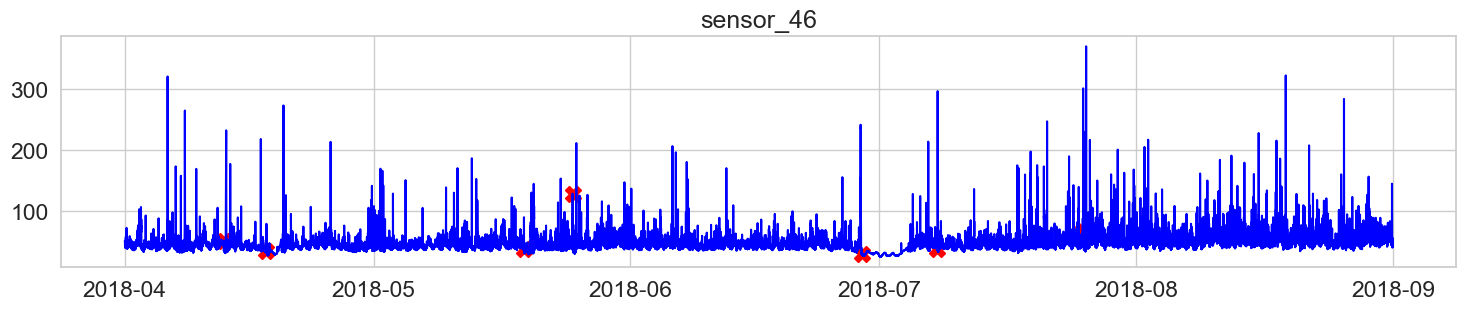

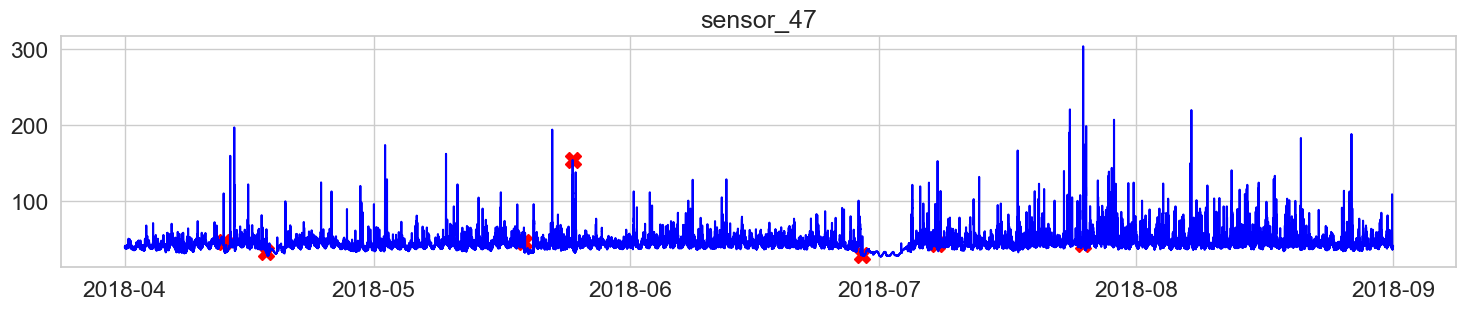

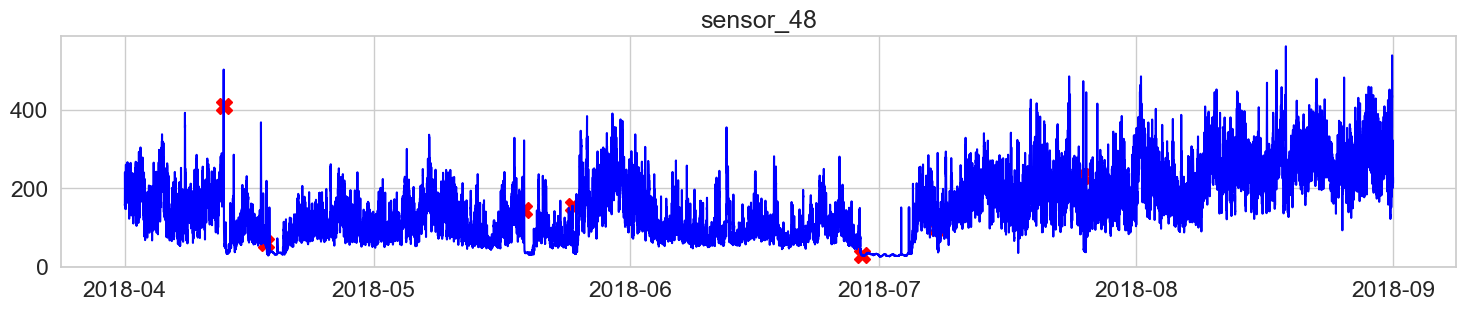

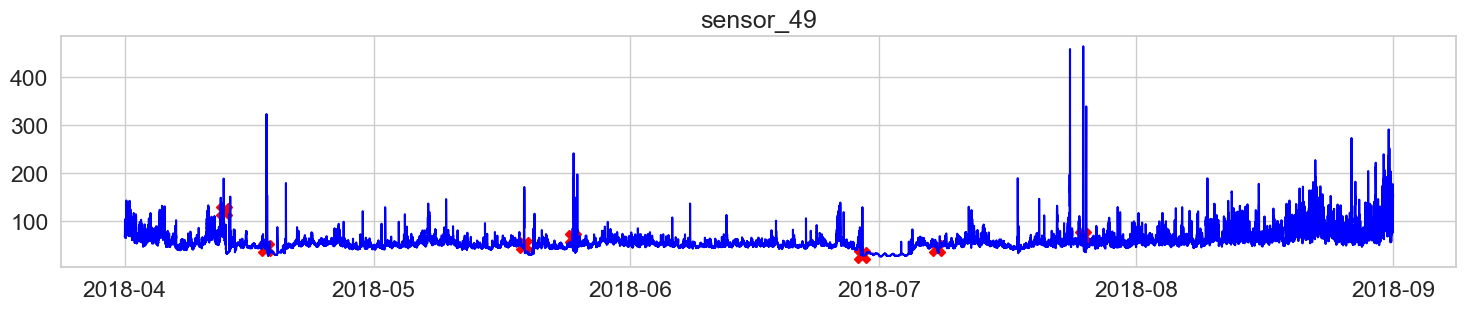

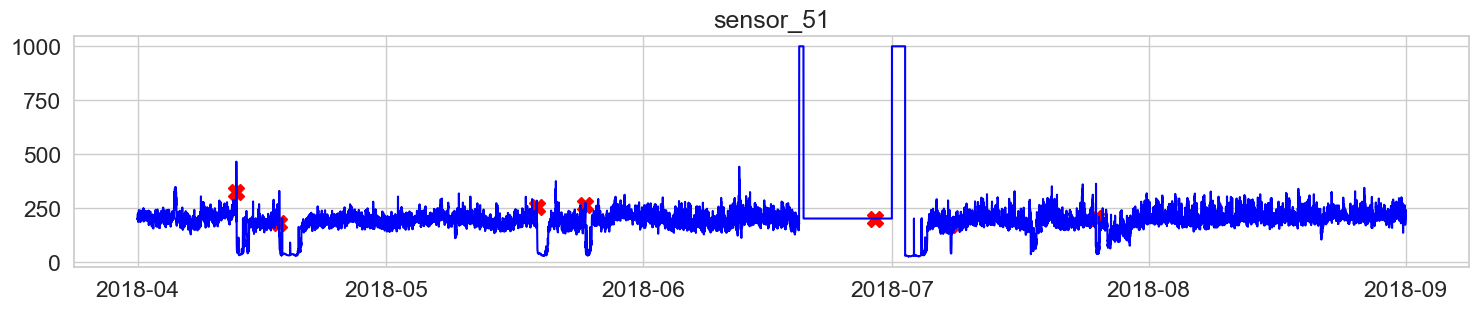

In [18]:
#extract the readings from the Broken state of the pump
broken= sensor_df[sensor_df['machine_status']=='BROKEN']

#Extract the name of the numerical columns
sensor_df_2 = sensor_df.drop(['machine_status'],axis=1)
names= sensor_df_2.columns

#plot timeseries for each sensor with Broken state marked with X in red color

for name in names:
    _=plt.figure(figsize=(18,3))
    _=plt.plot(broken[name],linestyle='none',marker='X',color='red',markersize=12)
    _=plt.plot(sensor_df[name],color='blue')
    _=plt.title(name)
    plt.show()

**DATA PRE_PROCESSING AND DIMENSIONALITY REDUCTION**

**Scaling the data**

In [20]:
from sklearn.preprocessing import StandardScaler

#scaling
scaler=StandardScaler()
sensor_df_2_scaled= scaler.fit_transform(sensor_df_2)
sensor_df_2_scaled = pd.DataFrame(sensor_df_2_scaled,columns=names)

In [21]:
sensor_df_2_scaled.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
1,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
2,0.180129,-0.072613,0.639386,1.093565,0.334786,0.008647,-0.082656,0.089329,0.207112,0.101892,...,-0.619939,-0.358970,-0.200379,-0.285516,1.737092,0.204388,-0.588641,0.061668,0.522906,0.009499
3,0.219228,-0.151675,0.627550,1.093564,0.260045,0.207693,-0.086035,0.185835,0.246628,0.136839,...,-0.619939,-0.384354,-0.271121,-0.310513,1.692010,0.204388,-0.588642,0.061668,0.507790,0.004024
4,0.182573,-0.138499,0.639386,1.093564,0.317909,0.184568,-0.069133,0.169195,0.246628,0.136839,...,-0.553995,-0.384354,-0.223959,-0.335509,1.714550,0.241389,-0.533219,0.089816,0.492674,-0.012402


**Principal Component Analysis**

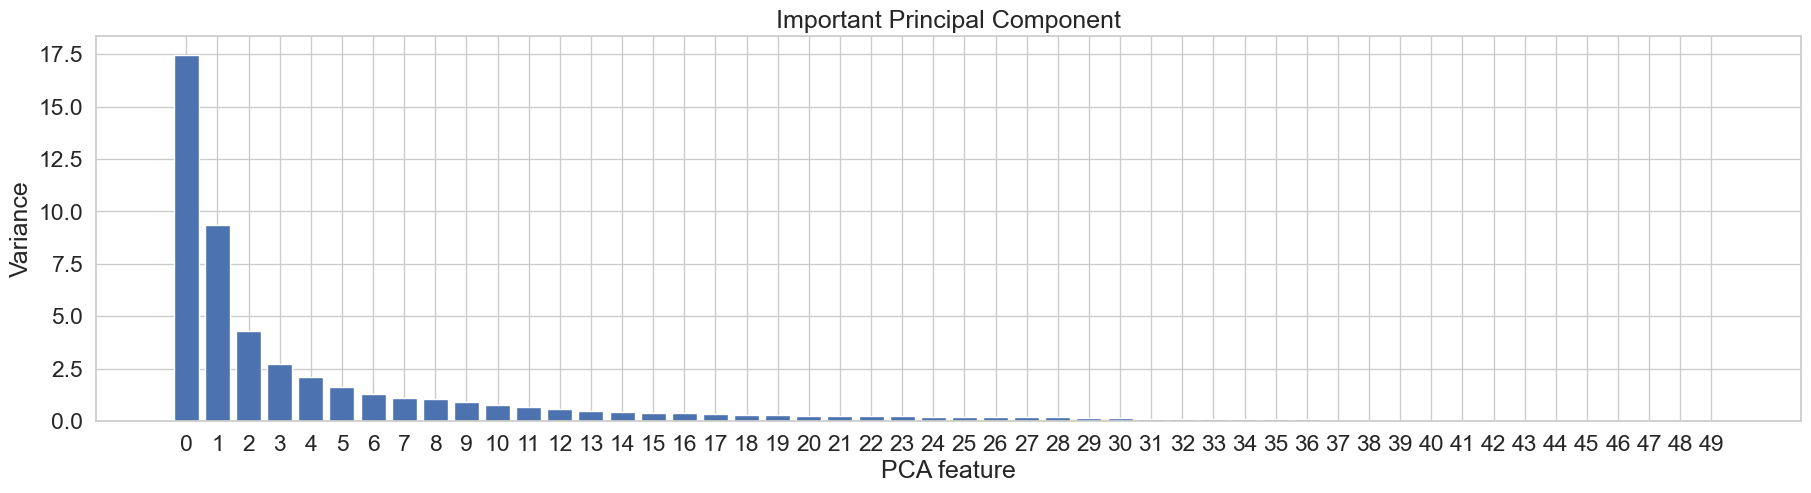

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(sensor_df_2_scaled)

#plot the principal components
features = range(pca.n_components_)
_=plt.figure(figsize=(22,5))
_=plt.bar(features,pca.explained_variance_)
_=plt.xlabel('PCA feature')
_=plt.ylabel('Variance')
_=plt.xticks(features)
_=plt.title('Important Principal Component')
plt.show()

In [23]:
#calculate PCA with 2 components
pca = PCA(n_components=2)
pComponents = pca.fit_transform(sensor_df_2_scaled)
principal_df = pd.DataFrame(data = pComponents,columns=['pca1','pca2'])

In [24]:
principal_df.head()

,pca1,pca2
0,-0.046056,0.490524
1,-0.046056,0.490524
2,-0.186309,0.500354
3,-0.186651,0.538034
4,-0.142655,0.645878


**Stationarity & Autocorrelation**

In [ ]:
# Augmented Dickey-Fuller (ADF) 測試來檢查時間序列是否存在單根，即檢測時間序列是否是非定態的 / 檢測時間序列穩定性
# [0] - ADF 統計值：這是測試的主要統計值 / [1] - p-value：用於決定該時間序列是否具有單根，即序列是否非定態 
# [2] - usedlag：使用的滯後數 / [3] nobs：用於ADF回歸和計算的觀察數
# [4] - critical values：各顯著性水平下的臨界值 / [5] - icbest：最大化信息準則如果自動選擇滯後
# ADF統計值越負，表示拒絕時間序列具有單根的假設的證據越強
# usedlag:使用的滯後數為 83。這表示在進行ADF回歸時，考慮了83個滯後
# nobs:觀察數為 220236，這是測試中使用的有效樣本數
# 臨界值:決定結果統計顯著性的關鍵標準 / 意味著如果ADF統計值小於（即：更負於）這些臨界值，則可在相應的置信水平下拒絕原假設。
# 在這個例子中，ADF統計值 -4.577 小於所有這些臨界值，因此在1%，5%，和10%的顯著性水平下都強烈拒絕了單根存在的假設
# icbest:值為 -306131.4545883199，這代表最大化信息準則的值。通常這個指標用於模型選擇，比如在選擇滯後階數時

#Stationarity

from statsmodels.tsa.stattools import adfuller

#run Augmented Dickey Fuller Test
# 返回一個包含檢測結果的元組
result = adfuller(principal_df['pca1'])

print(result)
#print p-value
# p-value 用於評估原假設的可信度。在ADF測試中，原假設通常是時間序列具有單根（是非定態的）
# 如果 p-value 很小（如：小於0.05），則拒絕原假設，認為時間序列是定態的 / 如果 p-value 較大，則無法拒絕原假設，時間序列可能是非定態的
print(result[1]) # 這裡的結果表明，序列實際上是定態的 -> 通過測試表現出一定的時間穩定性

(-4.577261017734451, 0.0001422261454758636, 83, 220236, {'1%': -3.430379692585317, '5%': -2.8615531237364724, '10%': -2.5667769852919347}, -306131.4545883199)
0.0001422261454758636


In [ ]:
#autocorrelation

# 計算 principal_df 數據框中 pca1 欄的每日百分比變化。pct_change() 函數用於計算序列中每個元素與其前一元素的百分比變化。
# 這常用於財經數據分析中，以觀察價格或指數的相對變動
#compute change in daily mean
pca1= principal_df['pca1'].pct_change()

# 首先使用 dropna() 方法移除由於百分比變化計算導致的任何NaN值（因為序列的第一個百分比變化值通常是NaN，沒有前一元素可以比較）。
# 然後，使用 autocorr() 函數計算序列的自相關。
# 自相關是度量時間序列中當前值與其自身過去值之間相關性的統計指標。在這裡，autocorr() 預設計算一階自相關，即當前值與其前一期值的相關程度
#Compute Autocorelation
autoco = pca1.dropna().autocorr()

# 自相關的範圍從-1到1，其中1表示完美的正自相關，-1表示完美的負自相關，0表示沒有自相關。高的正自相關可能表明數據中存在趨勢或周期模式
# 這個值接近於0，表示在 pca1 的時間序列變化中，當前值與其前一值之間幾乎沒有相關性 -> 意味著序列中的前一期值對當前值的預測提供極少影響
# 指示序列可能是隨機的（即隨機漫步）
# 這樣的自相關結果可能暗示標準的自迴歸模型（如AR、ARMA等）可能不適用於這種數據，因為這些模型依賴於數據點之間的相關性來進行有效預測
print('Autocorrelation is:',autoco)

Autocorrelation is: -7.216171623946395e-06


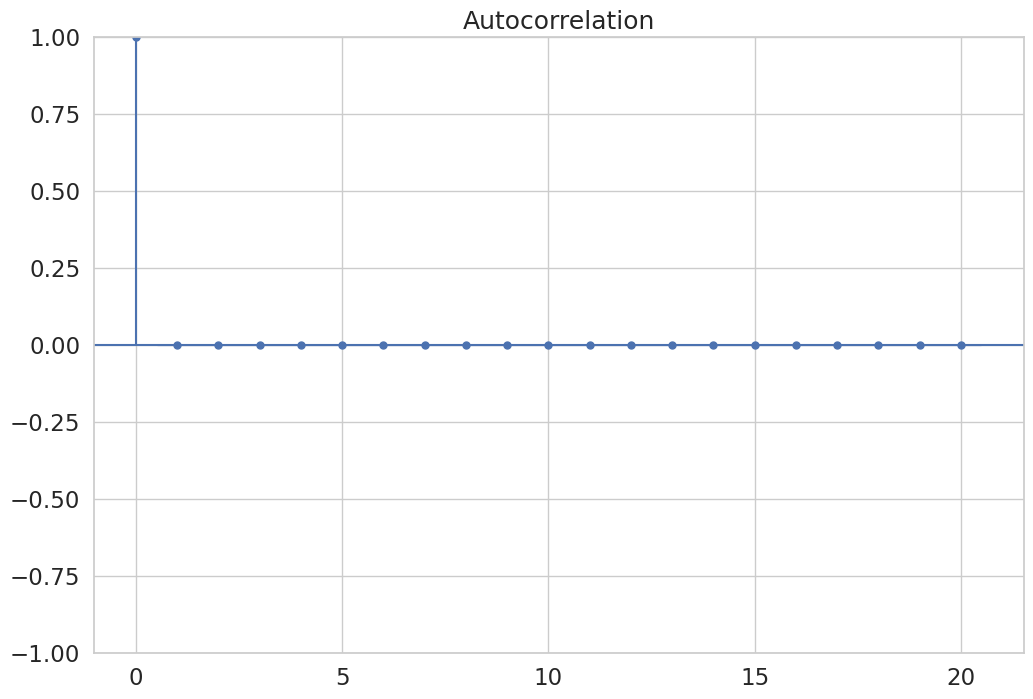

In [ ]:
# 滯後數(Lags)：在進行計算或分析時相對於某個時間點的時間偏移量
# 在時間序列中，一個數據點與它之前的第n個數據點之間的間隔被稱為滯後n。例如，如果我們今天看一個月的銷售數據，那麼昨天的數據是滯後1，前天的數據是滯後2，依此類推
# 在自相關（Autocorrelation）分析中，滯後數表示檢查數據與其過去值之間關係的時間間隔。例如，滯後1的自相關度量了序列中連續觀測之間的相關性，滯後2度量了間隔一期的觀測之間的相關性，等等。這有助於識別時間序列數據中可能存在的周期性或趨勢。
# 在建立如自迴歸（AR）模型時，滯後數指模型中包括的過去期數量。例如，一個AR(1)模型只考慮滯後1的數據（即前一期），而AR(2)模型會考慮滯後1和滯後2的數據
# 在進行時間序列分析時，選擇合適的滯後數是很重要的，因為它影響模型的準確性和復雜性。滯後數選擇不當可能導致過度擬合或忽略重要的時間依賴性。可以通過統計測試、信息準則（如AIC或BIC）或觀察自相關和偏自相關圖來確定最佳滯後數
# 自相關函數（ACF）圖 -> 衡量時間序列中觀察值與其過去值之間的相關程度的工具 -> 每個點代表特定滯後數下的自相關值

# 滯後0的自相關值：滯後0的自相關值始終為1，因為任何數據與其自身的相關總是完美的
# 圖中顯示，從滯後1開始到滯後20，自相關值接近於零，這意味著數據點之間幾乎沒有任何線性關聯性。這表明數據點與其前一期或更早期之間不具有顯著的時間序列相依性。
# 自相關值的範圍通常在-1到1之間。在此圖中，除了滯後0外，所有其他滯後的自相關值都維持在非常接近於0的水平，顯示無顯著的正或負相關。
# 當時間序列的自相關值在所有滯後下都接近於零時，這通常意味著時間序列可能是白噪音。在白噪音序列中，序列值是獨立且均勻分布的，這意味著序列中的觀察值沒有可預測的模式或趨勢
# 這種低自相關的結果可能意味著傳統的時間序列預測模型（如AR、MA、ARIMA）不適用於這類數據，因為這些模型依賴於數據點之間的相關性來進行有效的預測
# 適用模型：
# 1.隨機漫步模型：假設未來的值等於當前值加上一個隨機誤差 / 2.機器學習方法:可以探索使用非時間序列的機器學習方法，如:隨機森林、支持向量機或神經網絡 
# 3.結構突變分析：數據中可能包含結構性變化（如:政策改變、市場干預等） / 4.非線性模型：例如:閾值自迴歸（Threshold Autoregressive）模型或非線性自迴歸模型
# 5.異常檢測方法：如果目的是識別數據中的異常或突出現象，可以採用專門的異常檢測技術，如:孤立森林或基於聚類的異常檢測方法

#plot ACF
from statsmodels.graphics.tsaplots import plot_acf

# 在計算或繪製ACF之前，首先使用 dropna() 方法移除 pca1 中的所有缺失值（NaN）。這一步是必需的，因為ACF函數無法處理缺失值
# lags=20: 這指定了要計算和繪製自相關的滯後數。在這個例子中，它設置為20，這意味著函數將顯示從滯後0到滯後20的自相關
# alpha=0.05: 這設置了顯著性水平用於計算和繪製ACF圖上的置信區間。alpha=0.05 意味著95%的置信區間（即100*(1-alpha)%）。置信區間用於判斷自相關是否顯著不同於零
plot_acf(pca1.dropna(),lags=20,alpha=0.05)
plt.show()

**MODELING**

**Model-1 K-Means Clusting**

0    196973
1     23347
dtype: int64


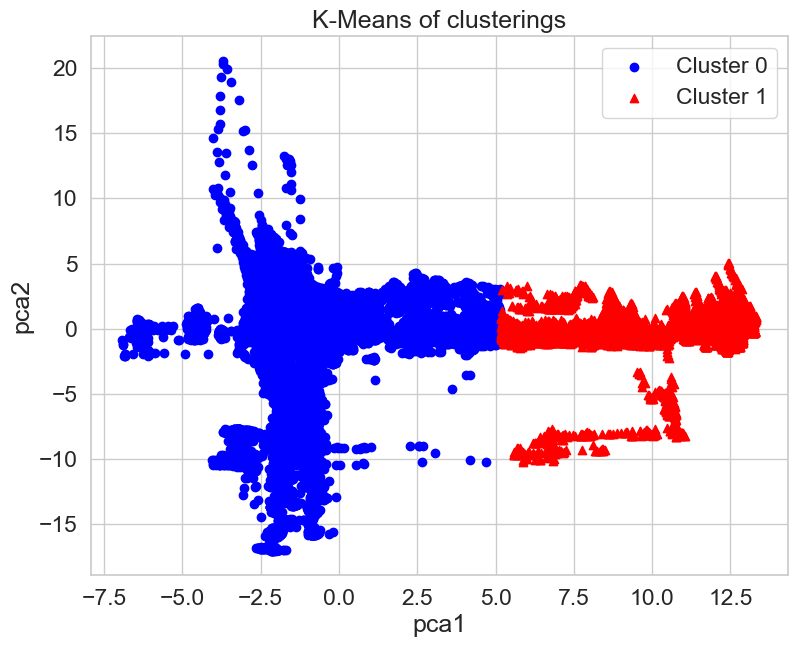

In [ ]:
#import kmeans
from sklearn.cluster import KMeans

#initialize and fit kmeans
kmeans = KMeans(n_clusters=2,random_state=42)
labels = kmeans.fit_predict(principal_df.values)

print(pd.DataFrame(labels).value_counts())

#plotting the clusters
# 繪製聚類結果
plt.figure(figsize=(9,7))
colors = ['blue', 'red']  # 為每個聚類指定顏色
markers = ['o', '^']      # 為每個聚類指定標記

for i, color, marker in zip(range(2), colors, markers):
    # 根據標籤劃分數據點
    cluster_points = principal_df[labels == i]
    plt.scatter(cluster_points['pca1'], cluster_points['pca2'], color=color, label=f'Cluster {i}', marker=marker)

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('K-Means of clusterings')
plt.legend()
plt.show()

In [ ]:
# 在聚類分析後評估每個點的“聚合度”或離群程度
# write a function that calucalates distance between each point and the centroid of the closest cluster

# data：一個數據框（DataFrame），其中包含了要進行距離計算的數據點
# model：已經擬合過的 KMeans 模型，用於訪問聚類中心和數據點的標籤
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    # distance：一個列表，用來存儲每個數據點到其對應聚類中心的距離
    distance = []
    # 使用一個迴圈遍歷 data 中的每個點
    for i in range(0,len(data)):
        # Xa 是數據點 i 的坐標，使用 np.array(data.loc[i]) 從 data 數據框中提取
        Xa = np.array(data.loc[i])
        # Xb 是該數據點所屬聚類的中心點。這是通過訪問 model.cluster_centers_ 陣列來實現的，其中 model.labels_[i] 給出了點 i 的聚類標籤
        Xb = model.cluster_centers_[model.labels_[i]]
        # 計算點 Xa 和聚類中心 Xb 之間的歐幾里得距離，並將結果追加到 distance 列表中
        distance.append(np.linalg.norm(Xa-Xb))
    # 以 data 的索引為索引，並包含計算出的每個點到其聚類中心的距離
    return pd.Series(distance, index=data.index)

In [ ]:
# 基於聚類中心的距離來標記異常值，是一種基於密度的異常檢測方法 / 假定距離聚類中心較遠的點比距離近的點更有可能是異常的
# 适用于数据集中聚类明显且异常点远离聚类中心的情况

# 假定數據集中大約有 13% 的數據點是異常值 
outliers_fraction = 0.13

# 計算 principal_df 數據框中每個點到其最近聚類中心的距離
distance = getDistanceByPoint(principal_df, kmeans)

# 計算數據集中 13% 所代表的實際數據點數量
number_of_outliers = int(outliers_fraction*len(distance))

# 從計算出的距離中取最大的 13%，並獲取這些距離中的最小值作為識別異常值的閾值 -> 意味著超過此閾值的數據點將被認為是異常的
threshold = distance.nlargest(number_of_outliers).min()

# 在 principal_df 中新增一欄 'kmeans_anomaly'，如果一個數據點的距離大於或等於閾值，該欄的值將標記為 1（表示異常），否則為 0（表示正常）
principal_df['kmeans_anomaly'] = (distance >= threshold).astype(int)

In [37]:
principal_df.head()

,pca1,pca2,kmeans_anomaly
0,-0.046056,0.490524,0
1,-0.046056,0.490524,0
2,-0.186309,0.500354,0
3,-0.186651,0.538034,0
4,-0.142655,0.645878,0


In [38]:
principal_df["kmeans_anomaly"].value_counts()

0    191679
1     28641
Name: kmeans_anomaly, dtype: int64

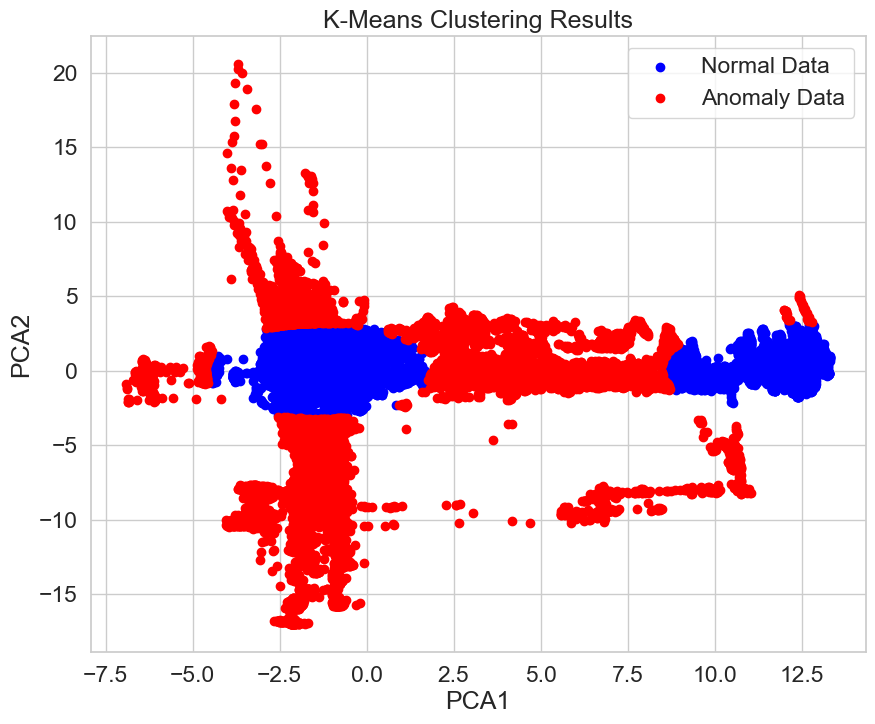

In [39]:
import matplotlib.pyplot as plt

# 將 DataFrame 按 'kmeans_anomaly' 分成正常和異常兩部分
normal_data = principal_df[principal_df['kmeans_anomaly'] == 0]
anomaly_data = principal_df[principal_df['kmeans_anomaly'] == 1]

plt.figure(figsize=(10, 8))
# 繪製正常數據點
plt.scatter(normal_data['pca1'], normal_data['pca2'], c='blue', label='Normal Data')
# 繪製異常數據點
plt.scatter(anomaly_data['pca1'], anomaly_data['pca2'], c='red', label='Anomaly Data')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

#### Visualization over different sensors

In [40]:
dfBroken = sensor_df[sensor_df["machine_status"]=="BROKEN"]

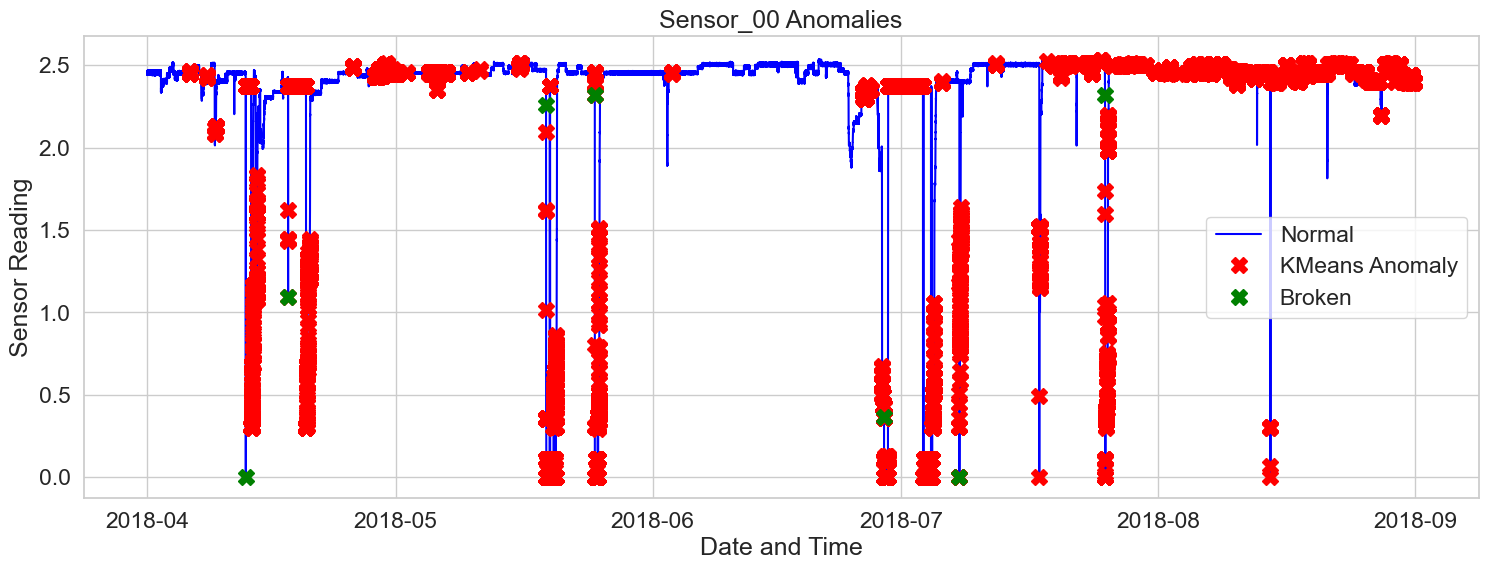

In [43]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=sensor_df.index)

# print(sensor_df)

a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

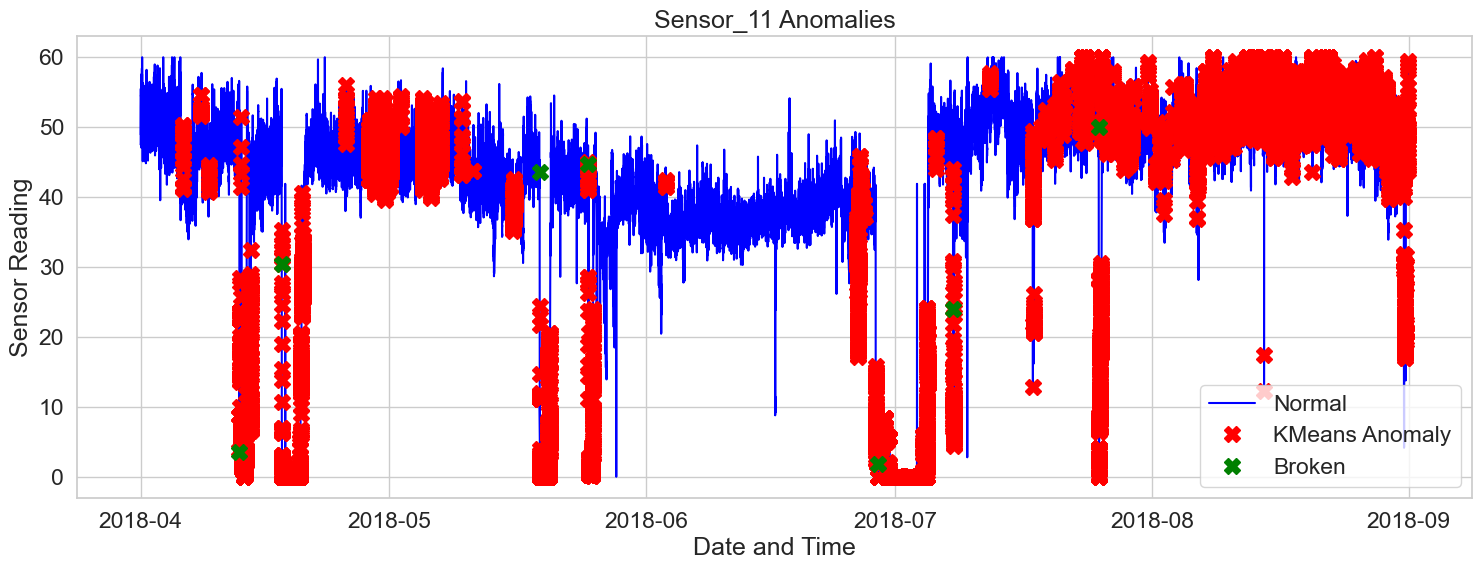

In [44]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(sensor_df['sensor_11'], color='blue', label='Normal')
plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_11 Anomalies')
plt.legend(loc='best')
plt.show()

#### Model 2 - Isolation Forest

In [ ]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest

# fit and predict
model_if =  IsolationForest(random_state=42)

principal_df['if_anomaly'] = pd.Series(model_if.fit_predict(principal_df.drop('kmeans_anomaly', axis = 1)))

In [48]:
principal_df

,pca1,pca2,kmeans_anomaly,if_anomaly
0,-0.046056,0.490524,0,-1
1,-0.046056,0.490524,0,-1
2,-0.186309,0.500354,0,1
3,-0.186651,0.538034,0,1
4,-0.142655,0.645878,0,1
...,...,...,...,...
220315,-2.030608,2.463434,0,1
220316,-2.030864,2.476912,0,1
220317,-2.044465,2.471342,0,1
220318,-1.930436,2.481889,0,1


In [47]:
principal_df['if_anomaly'].value_counts()

 1    159810
-1     60510
Name: if_anomaly, dtype: int64

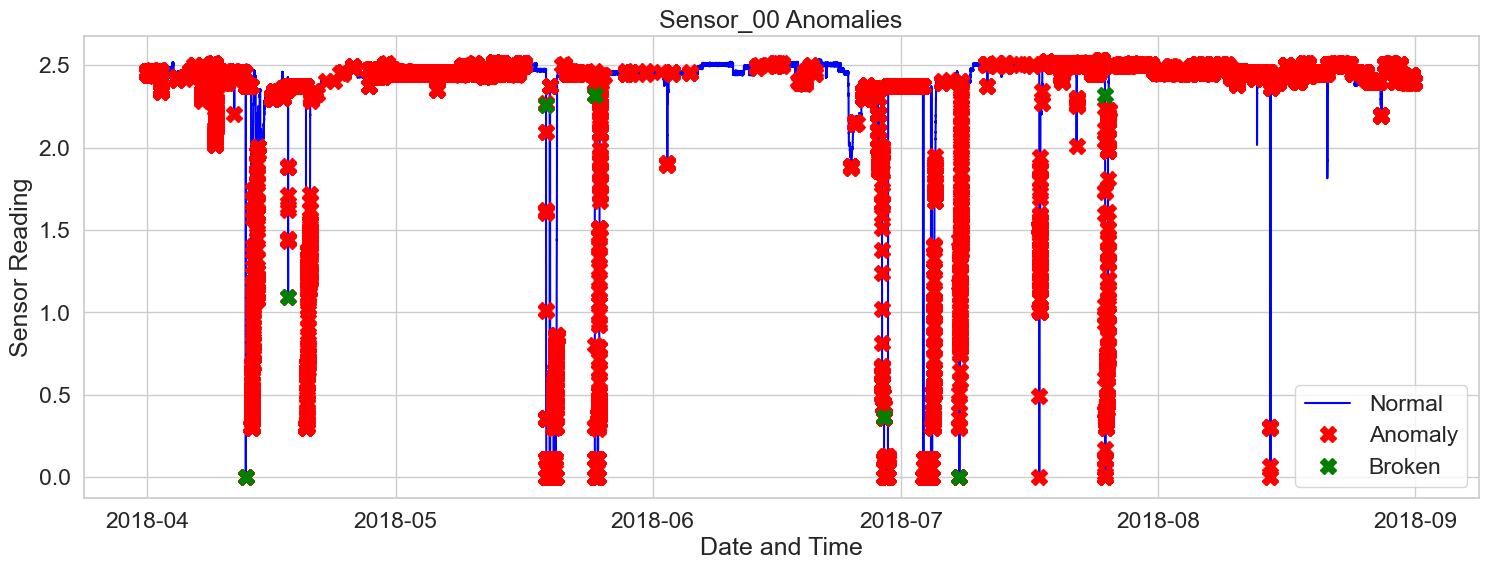

In [ ]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

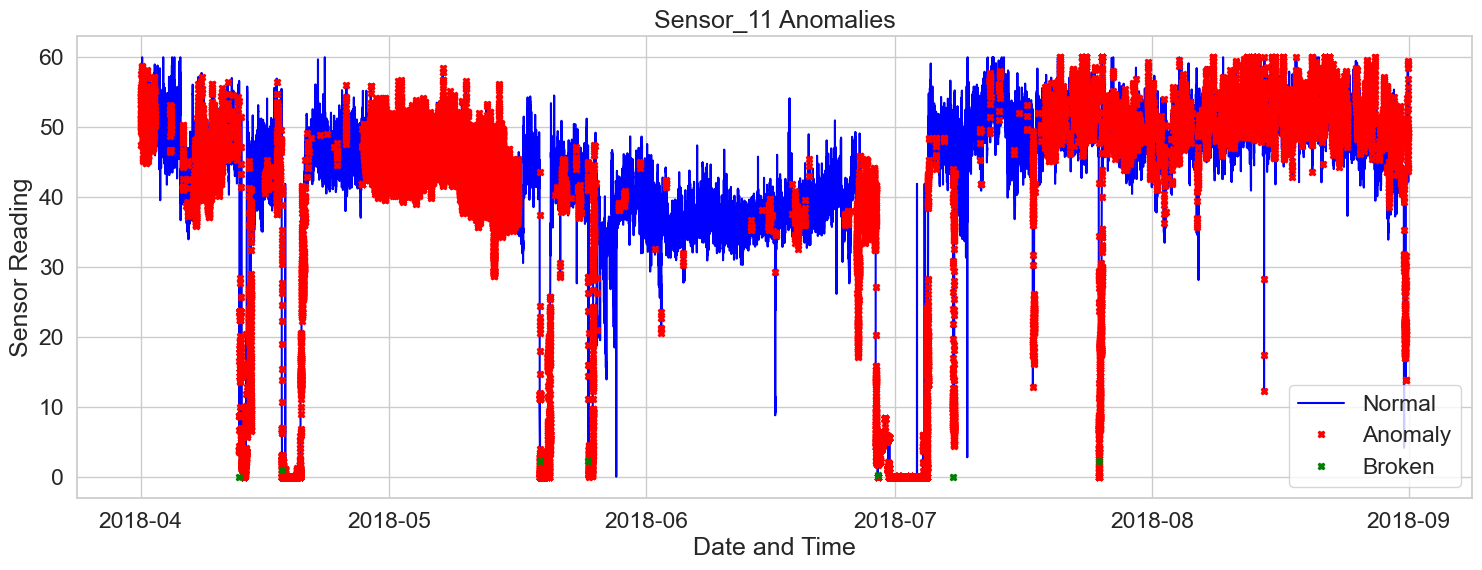

In [52]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(sensor_df['sensor_11'], color='blue', label='Normal')
plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=5, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_11 Anomalies')
plt.legend(loc='best')
plt.show()

### Evaluation

In [53]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [74]:
predictions = sensor_df[['machine_status', 'kmeans_anomaly', 'if_anomaly']]

In [75]:
predictions.head()

,machine_status,kmeans_anomaly,if_anomaly
index,,,
2018-04-01 00:00:00,NORMAL,0,-1
2018-04-01 00:01:00,NORMAL,0,-1
2018-04-01 00:02:00,NORMAL,0,1
2018-04-01 00:03:00,NORMAL,0,1
2018-04-01 00:04:00,NORMAL,0,1


In [76]:
# if anomaly uniformity. 1 is 0 and -1 is 1
predictions.loc[predictions["if_anomaly"] == 1, "if_anomaly"] = 0
predictions.loc[predictions["if_anomaly"] == -1, "if_anomaly"] = 1

In [77]:
predictions.head()

,machine_status,kmeans_anomaly,if_anomaly
index,,,
2018-04-01 00:00:00,NORMAL,0,1
2018-04-01 00:01:00,NORMAL,0,1
2018-04-01 00:02:00,NORMAL,0,0
2018-04-01 00:03:00,NORMAL,0,0
2018-04-01 00:04:00,NORMAL,0,0


In [78]:
# turning machine status numerical
predictions["machine_status"] = predictions["machine_status"].map({"NORMAL": 0, "RECOVERING": 1, "BROKEN": 1})

In [82]:
predictions.head()

,machine_status,kmeans_anomaly,if_anomaly
index,,,
2018-04-01 00:00:00,0,0,1
2018-04-01 00:01:00,0,0,1
2018-04-01 00:02:00,0,0,0
2018-04-01 00:03:00,0,0,0
2018-04-01 00:04:00,0,0,0


In [80]:
predictions["machine_status"].value_counts()

0    205836
1     14484
Name: machine_status, dtype: int64

#### K-Means Evaluation

In [ ]:
# 這個模型對於正常類別的預測非常精確和可靠，但對異常類別的預測精確度較低

# Precision (精確率): 表示被正確預測為該類別的預測中，實際屬於該類別的比例
# 對於類別 "0" (正常)，精確率為 1.00，意味著模型預測為正常的所有案例中，100% 都確實是正常 / 對於類別 "1" (異常)，精確率為 0.50，意味著模型預測為異常的案例中，只有 50% 是真正的異常
# Recall (召回率): 表示實際為該類別的案例中，被模型正確預測為該類別的比例
# 對於類別 "0"，召回率為 0.93，表示實際為正常的案例中，有 93% 被模型正確預測為正常 / 對於類別 "1"，召回率為 0.98，表示實際為異常的案例中，有 98% 被模型正確預測為異常
# F1-Score: 是精確率和召回率的調和平均，用於衡量模型的整體精確性
# 類別 "0" 的 F1-score 為 0.96，顯示對於正常類別的預測是很好的 / 類別 "1" 的 F1-score 為 0.66，相比之下，這表明對異常類別的預測不如正常類別那麼準確
# Support: 表示每個類別在數據集中的實例數量 / 類別 "0" 有 205836 個實例 / 類別 "1" 有 14484 個實例
# Accuracy (準確率): 表示所有預測中，預測正確的比例，這裡為 0.93
# Macro Avg: 計算每個類別未加權平均的指標 / Macro average 的精確率為 0.75，召回率為 0.96，F1-score 為 0.81
# Weighted Avg: 計算每個類別按支持度加權的平均指標 / Weighted average 的精確率為 0.97，召回率為 0.93，F1-score 為 0.94

# classification report
print(classification_report(predictions['machine_status'].values, predictions['kmeans_anomaly'].values))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    205836
           1       0.50      0.98      0.66     14484

    accuracy                           0.93    220320
   macro avg       0.75      0.96      0.81    220320
weighted avg       0.97      0.93      0.94    220320



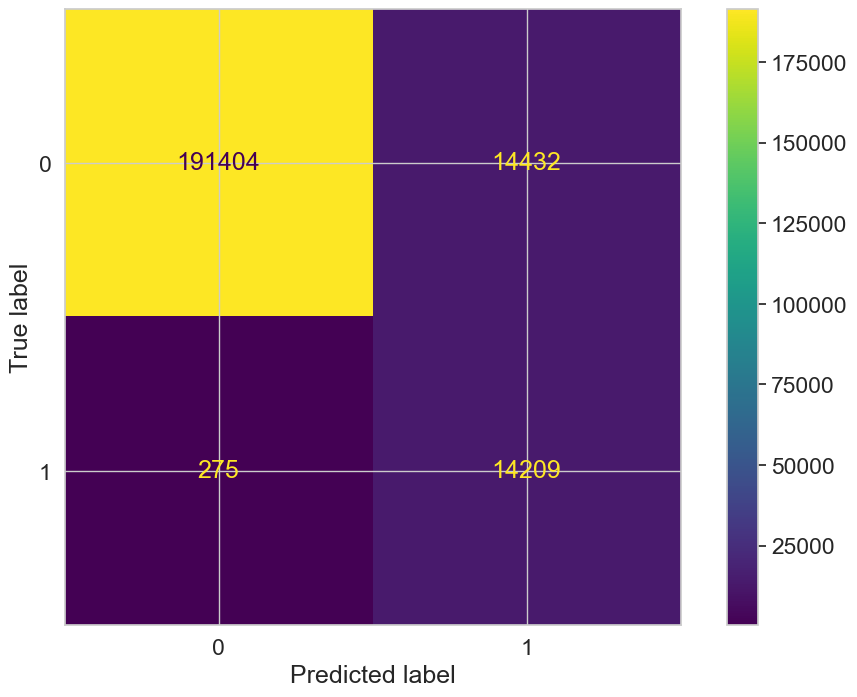

In [ ]:
# 左上方 (True Label 0, Predicted Label 0): 191404 個案例被正確預測為正常（真陽性）。 TP
# 右上方 (True Label 0, Predicted Label 1): 14432 個案例被錯誤預測為異常（假陽性）。  FP
# 左下方 (True Label 1, Predicted Label 0): 275 個案例被錯誤預測為正常（假陰性）。    FN
# 右下方 (True Label 1, Predicted Label 1): 14209 個案例被正確預測為異常（真陰性）。  TN

# confusion matrix
ConfusionMatrixDisplay.from_predictions(predictions['machine_status'].values,predictions['kmeans_anomaly'].values)
plt.show()

ROC AUC: 0.96


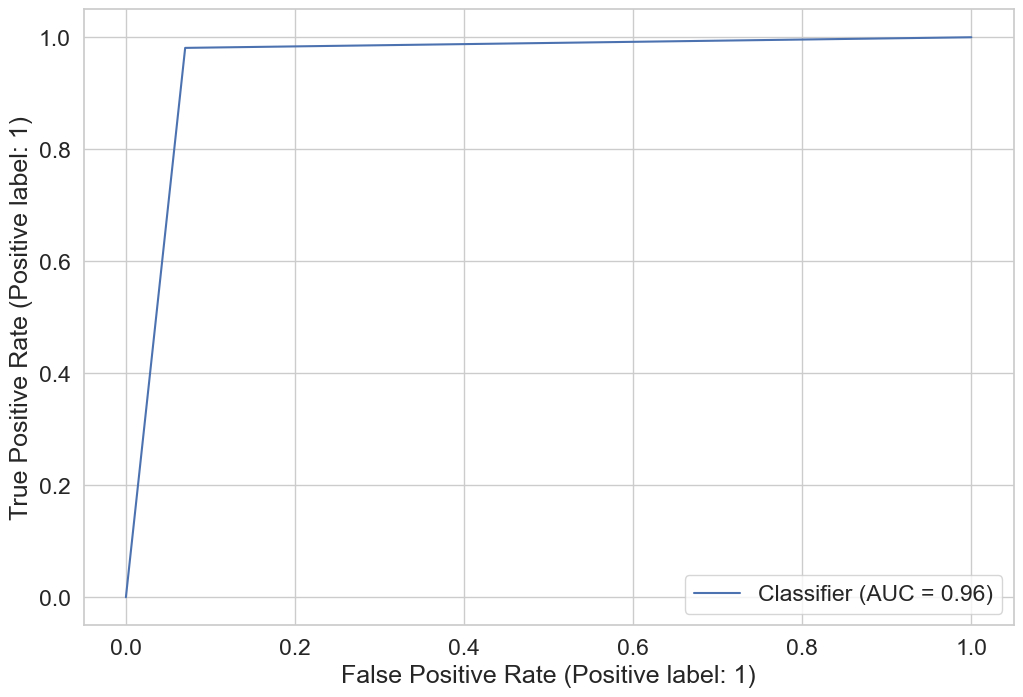

In [88]:
# 真陽性率（TPR, True Positive Rate）：TP/TP+FN
# 假陽性率（FPR, False Positive Rate)：FP/FP+TN

from sklearn.metrics import roc_curve, auc

# 計算ROC曲線
fpr, tpr, thresholds = roc_curve(predictions['machine_status'],predictions['kmeans_anomaly'])

# 計算AUC
roc_auc = auc(fpr, tpr)
print("ROC AUC: %0.2f" % roc_auc)

# roc curve
RocCurveDisplay.from_predictions(predictions['machine_status'],predictions['kmeans_anomaly'])
plt.show()

#### Isolation Forest Evaluation

In [ ]:
# Precision (精確率): 表示被正確預測為該類別的預測中，實際屬於該類別的比例
# 對於類別 "0" (正常)，精確率為 1.00，意味著模型預測為正常的所有案例中，100% 都確實是正常 / 對於類別 "1" (異常)，精確率為 0.24，意味著模型預測為異常的案例中，只有 24% 是真正的異常
# Recall (召回率): 表示實際為該類別的案例中，被模型正確預測為該類別的比例
# 對於類別 "0"，召回率為 0.78，表示實際為正常的案例中，有 78% 被模型正確預測為正常 / 對於類別 "1"，召回率為 0.99，表示實際為異常的案例中，有 99% 被模型正確預測為異常
# F1-Score: 是精確率和召回率的調和平均，用於衡量模型的整體精確性
# 類別 "0" 的 F1-score 為 0.87，顯示對於正常類別的預測是很好的 / 類別 "1" 的 F1-score 為 0.38，相比之下，這表明對異常類別的預測不如正常類別那麼準確
# Support: 表示每個類別在數據集中的實例數量 / 類別 "0" 有 205836 個實例 / 類別 "1" 有 14484 個實例
# Accuracy (準確率): 表示所有預測中，預測正確的比例，這裡為 0.79
# Macro Avg: 計算每個類別未加權平均的指標 / Macro average 的精確率為 0.62，召回率為 0.88，F1-score 為 0.63
# Weighted Avg: 計算每個類別按支持度加權的平均指標 / Weighted average 的精確率為 0.95，召回率為 0.79，F1-score 為 0.84

print(classification_report(predictions['machine_status'],predictions['if_anomaly']))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87    205836
           1       0.24      0.99      0.38     14484

    accuracy                           0.79    220320
   macro avg       0.62      0.88      0.63    220320
weighted avg       0.95      0.79      0.84    220320



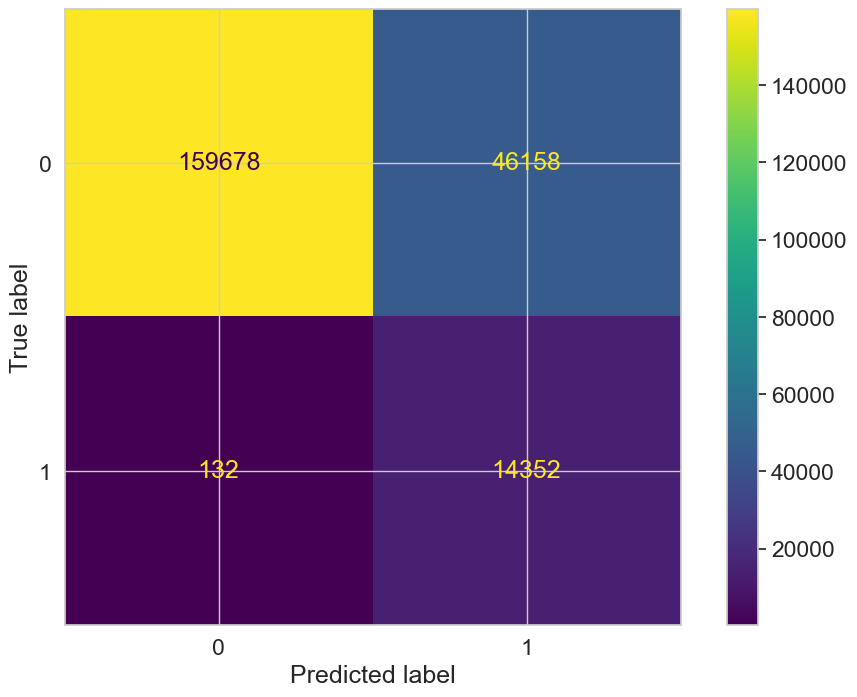

In [ ]:
# 左上方 (True Label 0, Predicted Label 0): 159678 個案例被正確預測為正常（真陽性）。 TP
# 右上方 (True Label 0, Predicted Label 1): 46158 個案例被錯誤預測為異常（假陽性）。  FP
# 左下方 (True Label 1, Predicted Label 0): 132 個案例被錯誤預測為正常（假陰性）。    FN
# 右下方 (True Label 1, Predicted Label 1): 14352 個案例被正確預測為異常（真陰性）。  TN

ConfusionMatrixDisplay.from_predictions(predictions['machine_status'],predictions['if_anomaly'])
plt.show()

ROC AUC: 0.88


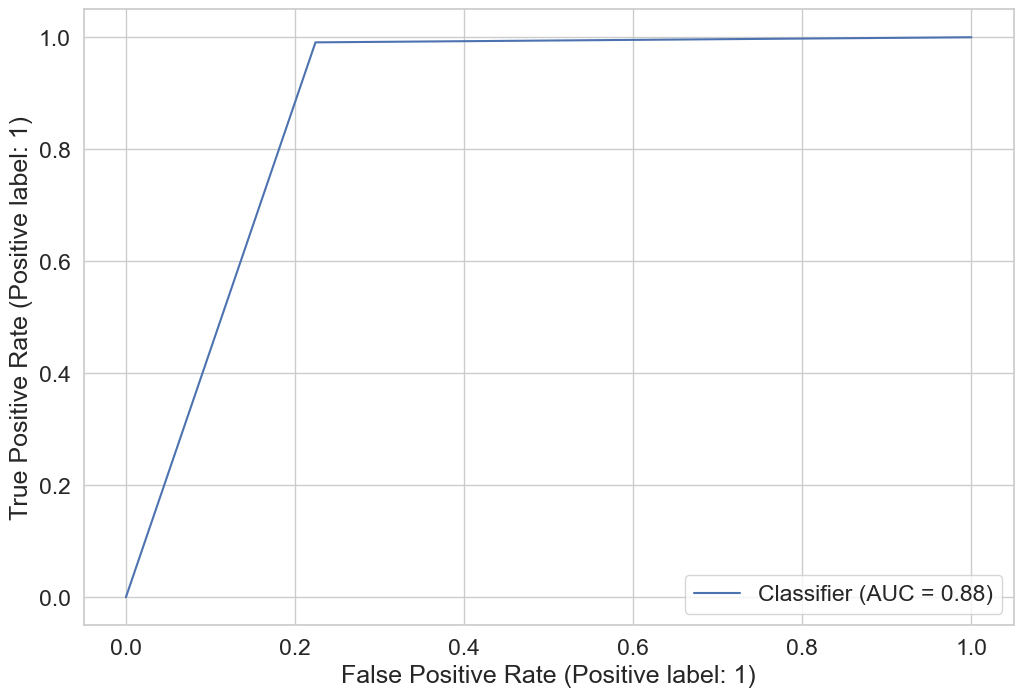

In [90]:
# 真陽性率（TPR, True Positive Rate）：TP/TP+FN
# 假陽性率（FPR, False Positive Rate)：FP/FP+TN

from sklearn.metrics import roc_curve, auc

# 計算ROC曲線
fpr, tpr, thresholds = roc_curve(predictions['machine_status'],predictions['if_anomaly'])

# 計算AUC
roc_auc = auc(fpr, tpr)
print("ROC AUC: %0.2f" % roc_auc)

RocCurveDisplay.from_predictions(predictions['machine_status'],predictions['if_anomaly'])
plt.show()